## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split


#from sklearn.metrics import classification_report, confusion_matrix

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")



## Loading the dataset

In [3]:
# mount the google drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the dataset
loan_data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Project2-PersonalLoanCampaign/Loan_Modelling.csv")

In [5]:
# copying the data to another variable to avoid any changes to original data
df = loan_data.copy()

## Data Overview

* Observations
* Sanity checks

In [6]:
# viewing the first 5 rows of the data
df.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

* The dataset contains information on customers, with features such as `Age`, `Experience`, `Income`, `CCAvg`, `Mortgage` and a target variable `Personal_loan`.
* The `ID` column appears to be an identifier and can likely be dropped from the analysis since it doesn't provide predictive power.
* Features such as `Education`, `Securities_Account`, and `CD_Account` are categorical.
* Some variables are `numeric` (`Income`, `Age`, `Experience`, etc.), while others are `binary categorical` (`Securities_Account`, `CD_Account`, etc.).


In [7]:
# viewing the last 5 rows of the data
df.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

* We can observe there are mix of customers who use Online services represented by `0s` and `1s`.
* Some customers have taken mortgage, but from the `last 5 rows` we see there is `1` customer out of `5` who took the mortgage.
* Some customers `age` is greater than `60` and those customers have more experience.

In [8]:
# checking the shape of the dataset
df.shape

(5000, 14)

* The data has `5000 rows` and `14 columns`.


In [9]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* The dataset has all numeric columns out of which 14 columns are of integer type and 1 colum `CCAvg` which is a float type.

In [10]:
# checking for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the data

In [11]:
# checking the duplicated entries
print('There are ',df.duplicated().sum(), 'number of duplicate entries in the data')

There are  0 number of duplicate entries in the data


In [12]:
# checking the number of unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

* The target variable `Personal_Loan` is `binary` i.e. `0` or `1`.
* Variable `Education` has `3` unique levels:`Undergrad`, `Graduate`, `Advanced/Professional`
* Other binary features include `Securities_Account`, `CD_Account`, `Online` and `CreditCard`

In [13]:
# Let's look at the statistical summary of the data
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* `Age` range is from `23 years` to `67 years` and the mean age is `45.3 years`.
* `Experience` range is from `-3 years` to `43 years` and mean is around `20.1 years`. `Experience with `-3 years` indicates that there must be some data error and needs further investigation.`
* `Income` range is `$8,000 to $224,000` and average income is `$73,774`.
* `Family` size range is from `1 to 4` members. Most of the customers have `small` to `medium` sized families.
* `CCAvg` range is fom `$0 to $10,000` with a mean of `$1,937.94`.
* `Education` range is from 1 to 3 with an average close to 1.88.
* `Mortgage` range is between `$0 to $635,000` with a mean of `$56,498.80`. A significant proportion of customers have `no mortgages`.
* `Personal_Loan` mean is `0.0914`. That means approximately `9.6%` of customers `accepted` a personal loan.
* `Securities_Account`, `CD_Account`, `Online` and `CreditCard` are the binary features and the statistics show the distribution of `0s` and `1s`.

In [14]:
# checking unique Experience values
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

* There are some values in the `Experience` feature that are `negative` and they need to be treated.

In [15]:
# checking for Experience values less than 0
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

* `-1, -2, -3` are the unique negative values identified in the `Experience`

In [16]:
# fix negative values in the Experience variable by replacing them positive value assuming minus sign was an error
df['Experience'] = df['Experience'].apply(lambda x: abs(x))

In [17]:
# checking for Experience values less than 0 for making sure there are no negative values.
df[df["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

* There are no negative values in the `Experience` column after fixing the negative values.

In [18]:
# checking unique Education values
df['Education'].unique()

array([1, 2, 3])

* There are `3 unique values` in the `Education` column.

In [19]:
# checking unique ZIPCode values
df['ZIPCode'].nunique()

467

* There are `467 values` in the `ZIPCode` column.

In [20]:
# feature engineering - The first two digits of a ZIP code correspond to a broad geographic region
# (usually a state or a group of states). By using the first two digits,
# you can generalize the location information without being too specific.
df["ZIPCode"] = df["ZIPCode"].astype(str)
df['ZIPCode'] = df['ZIPCode'].str[:2]

In [21]:
# checking unique ZIPCode values
df['ZIPCode'].nunique()

7

* There are `7 unique values` after the feature engineering for the column `ZIPCode`.

In [22]:
# drop ID column as it has no significance as a predictor.
df.drop(['ID'], axis=1, inplace=True)

In [23]:
# display the updated dataframe structure to confirm column ID is deleted.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


* Confirmed that `ID` column is deleted

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
- Based on the Exploratory Data Analysis below (`# univariate analysis - Mortgage`), the Morgage distribution is highly skewed, with a significant peak at 0 indicating that many customers do not have a mortgage.
- Approximately 69.24% of the customers have a 0 mortgage value. A small number of customers have higher mortgage values, which is showing up as outliers in the distribution.
- There are several high-value outliers with some customers having mortgage amounts as high as $635,000.

2. How many customers have credit cards?
- Based on the Exploratory Data Analysis below (`# univariate analysis - CreditCard`), a total of 1,472 customers (29.4%) have credit cards issues by other banks and 3528 customers (70.6%) do not use a credit card.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
- Based on the Exploratory Data Analysis below (`# bivariate analysis - correlation between all features and the target variable Personal_Loan`), Income, CCAvg, Education, and Family show positive correlations with the Personal_Loan attribute.

4. How does a customer's interest in purchasing a loan vary with their age?
- Based on the Exploratory Data Analysis below (`# bivariate analysis - Loan purchase by Age`), customers who did not accept the personal loan show a relatively uniform distribution of age, with a slight peak around the 30-50 years age range.
- Customers who accepted the personal loan tend to cluster more around the 30-50 year age range, indicating a higher likelihood of loan acceptance within the age group.
- Younger customers (below 30) and older customers (above 60) seem less likely to take a loan.

5. How does a customer's interest in purchasing a loan vary with their education?
- Based on the Exploratory Data Analysis below (`# bivariate analysis - Loan purchase by Education`), the majority of customers with an undergraduate degree did not accept the personal loan (2003 out of 2096), only a small fraction (93) of undergraduate customers accepted the loan.
- Graduate-level customers also show a higher count of non-loan takers (1221 out of 1403).However, the acceptance rate is higher for graduates compared to undergraduates with 182 customers accepting the loan.
- Customers with an advanced or professional degree have the highest loan acceptance rate. Out of 1501 customers, 205 customers have accepted the loan, which is a higher proportion compared to the other education levels.

In [24]:
# function for plotting stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

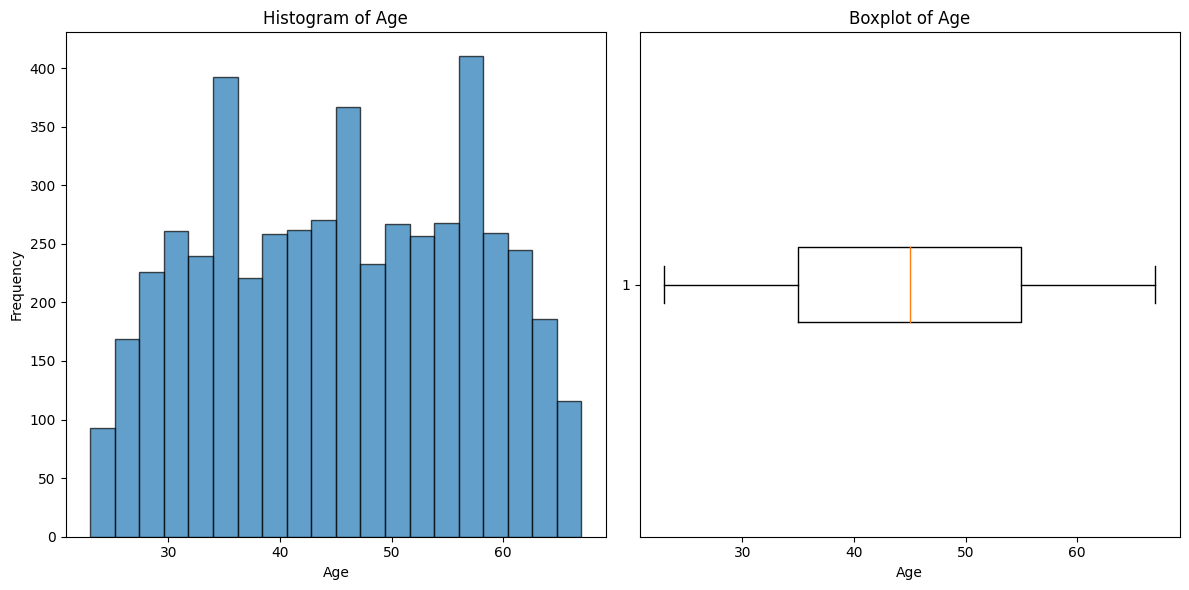

In [26]:
# univariate analysis - Age
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram for Age
axes[0].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plotting the boxplot for Age
axes[1].boxplot(df['Age'], vert=False)
axes[1].set_title('Boxplot of Age')
axes[1].set_xlabel('Age')

# Show the plots
plt.tight_layout()
plt.show()

* `Age` is distributed roughly normal centred around `45 years`.
* Histogram plot appears to be slightly `right-skewed` with a `higher concentration` of customers in the age `30-55 years` range.
* There is a noticeable dip in the number of customers below the age of `30 years` and very few customers are over `65 years`.
* Boxplot shows the median age is around `45 years`, with the middle `50%` of the data falling between `35 and 55 years` as above.
* There are `no extreme outliers` though the whiskers extend to cover the full range of ages from the mid `20s` to the late `60s`.

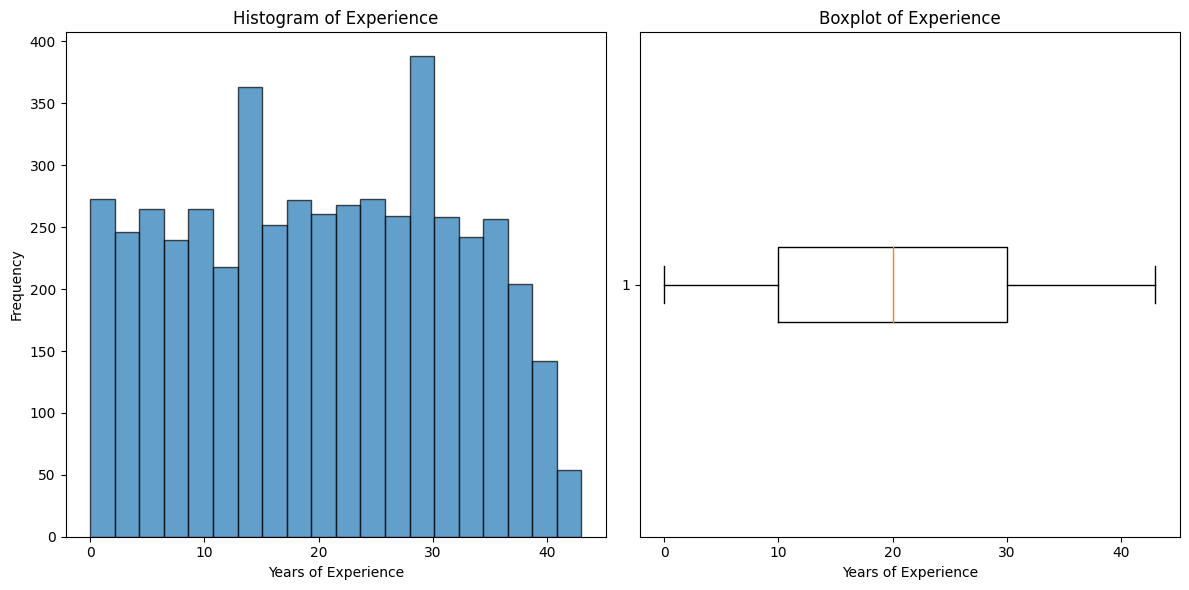

In [27]:
# univariate analysis - Experience
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram for Experience
axes[0].hist(df['Experience'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Experience')
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Frequency')

# Plotting the boxplot for Experience
axes[1].boxplot(df['Experience'], vert=False)
axes[1].set_title('Boxplot of Experience')
axes[1].set_xlabel('Years of Experience')

# Show the plots
plt.tight_layout()
plt.show()

* `Experience` distribution shows a peak in the range `10-30 years` with most individuals having between `10 and 30 years` of experience.
* There is a low number of customers with experience less than `5 years` and gradual decline after `30 years` of experience.
* The median experience remains around `20 years` with IQR between `10 and 30 years`.
* There are no outliers and overall range spans from `0 to 43 years` without any anomalies.


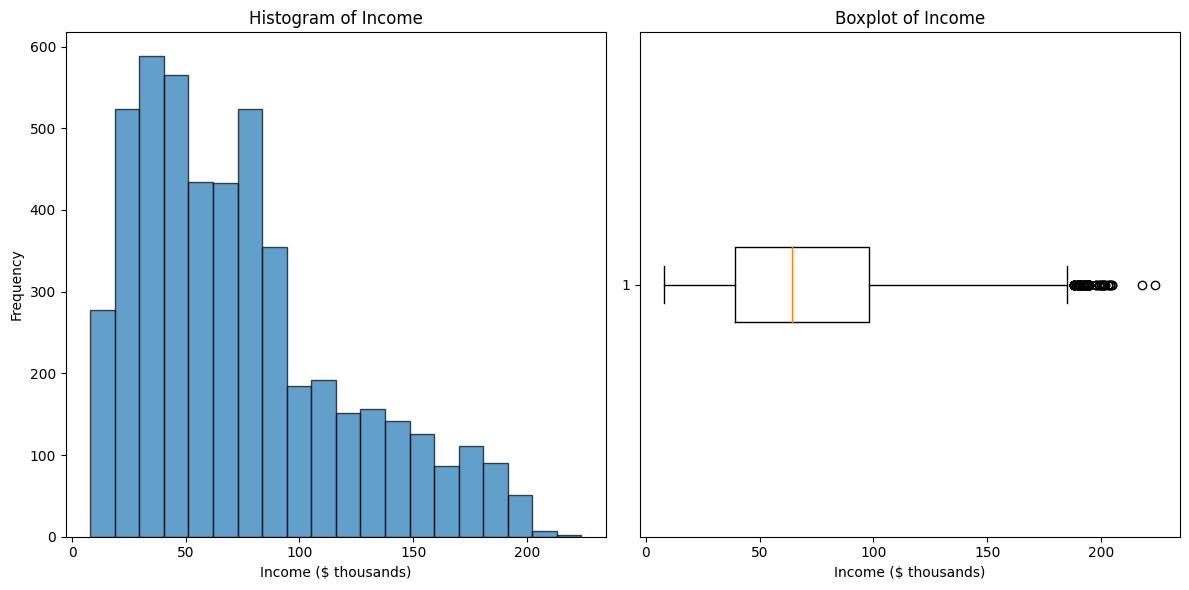

In [28]:
# univariate analysis - Income
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram for Income
axes[0].hist(df['Income'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Income')
axes[0].set_xlabel('Income ($ thousands)')
axes[0].set_ylabel('Frequency')

# Plotting the boxplot for Income
axes[1].boxplot(df['Income'], vert=False)
axes[1].set_title('Boxplot of Income')
axes[1].set_xlabel('Income ($ thousands)')

# Show the plots
plt.tight_layout()
plt.show()

* `Income` seems to be `positively skewed`, with a few customers having significantly higher incomes between `$10,000` and `$100,000`.
* A large number of customers earn less than `$50,000` while only a fraction earn significantly more upto `$224,000`.
* There are some high-income customers that contribute to the tail end of the distribution.
* The median income is around `$64,000` with the middle `50%`of the data ranging from approximately `$39,000` to `$98,000`.


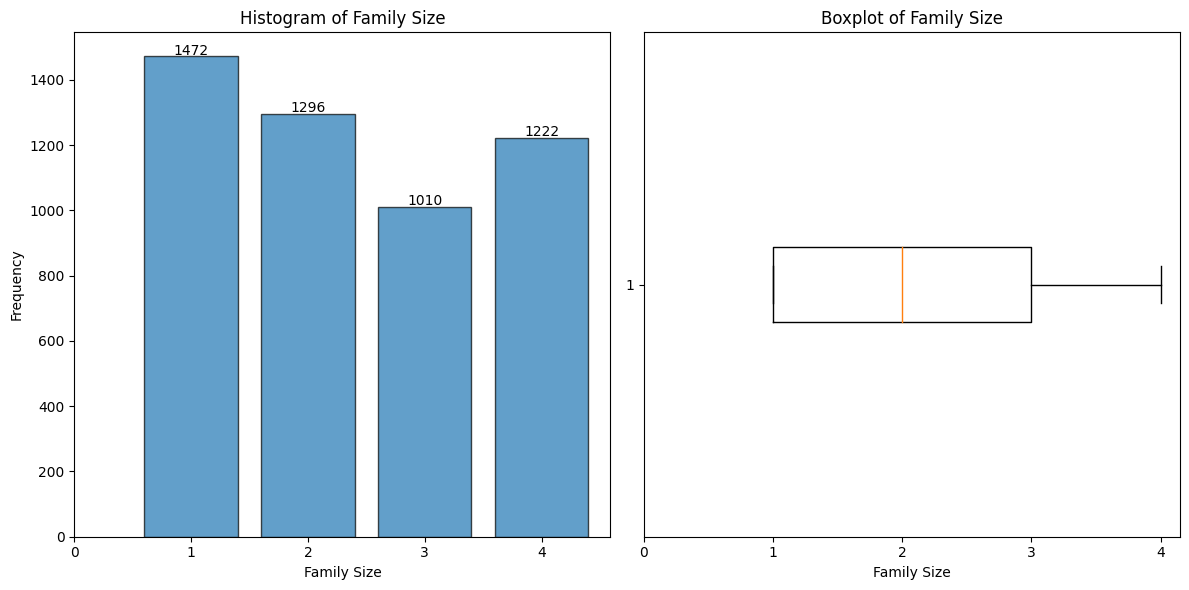

In [29]:
# univariate analysis - Family
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram for Family size
family_counts = df['Family'].value_counts().sort_index()
axes[0].bar(family_counts.index, family_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Family Size')
axes[0].set_xticks([0, 1, 2, 3, 4])
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Frequency')

# Adding the counts on top of the bars
for i, count in enumerate(family_counts.values):
    axes[0].text(family_counts.index[i], count + 5, str(count), ha='center')

# Plotting the boxplot for Family size
axes[1].boxplot(df['Family'], vert=False)
axes[1].set_title('Boxplot of Family Size')
axes[1].set_xticks([0, 1, 2, 3, 4])
axes[1].set_xlabel('Family Size')

# Show the plots
plt.tight_layout()
plt.show()

* Most family sizes are 1 to 3 members with a fewer families having 4 members.
* The counts are as below:
    * Family size = 1: 1366 customers
    * Family size = 2: 1257 customers
    * Family size = 3: 1092 customers
    * Family size = 4: 1285 customers
* There are no outliers found in the family sizes.

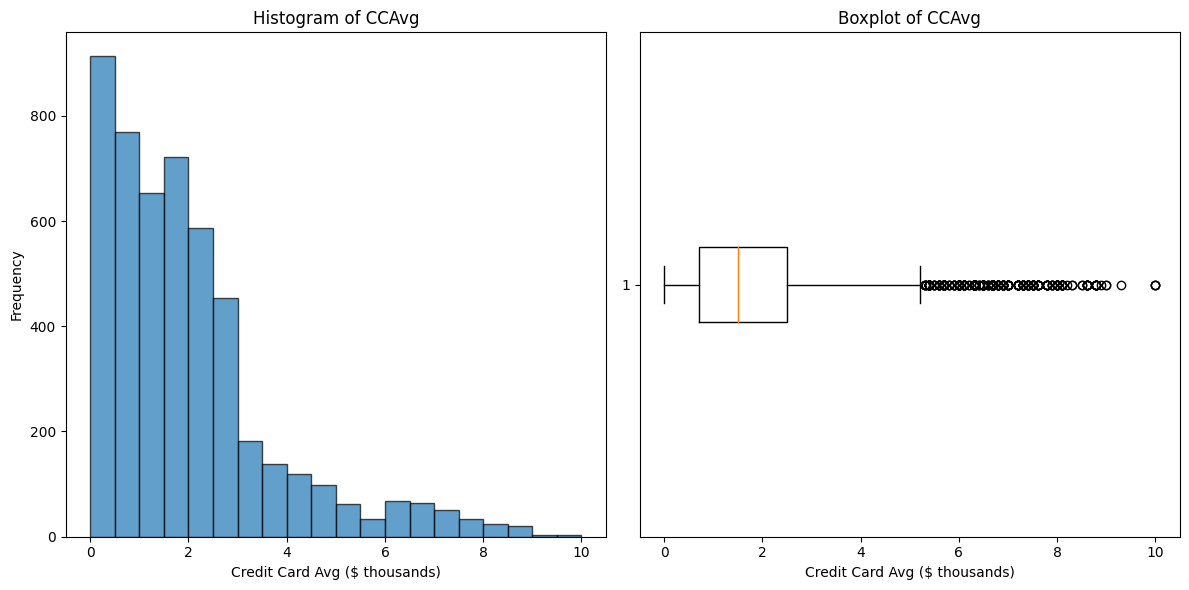

In [30]:
# univariate analysis - CCAvg
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram for CCAvg
axes[0].hist(df['CCAvg'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of CCAvg')
axes[0].set_xlabel('Credit Card Avg ($ thousands)')
axes[0].set_ylabel('Frequency')

# Plotting the boxplot for CCAvg
axes[1].boxplot(df['CCAvg'], vert=False)
axes[1].set_title('Boxplot of CCAvg')
axes[1].set_xlabel('Credit Card Avg ($ thousands)')

# Show the plots
plt.tight_layout()
plt.show()

* `Heavily right skewed` with the majority of the customers spending less than `$3,000` on average.
* There are few customers with higher spending amounts and only a small number of customers spend close to `$10,000`.
* `CCAvg` is slightly above `$1,5000` with the IQR extending from around `$700` to `$2,500`.
* There are several outliers in the higher range of credit card spending, as indicated by the points outside the whiskers of the boxplot.
* The maximum value reaches `$10,000`, but the bulk of the data shows the concentration at much lower spending levels.

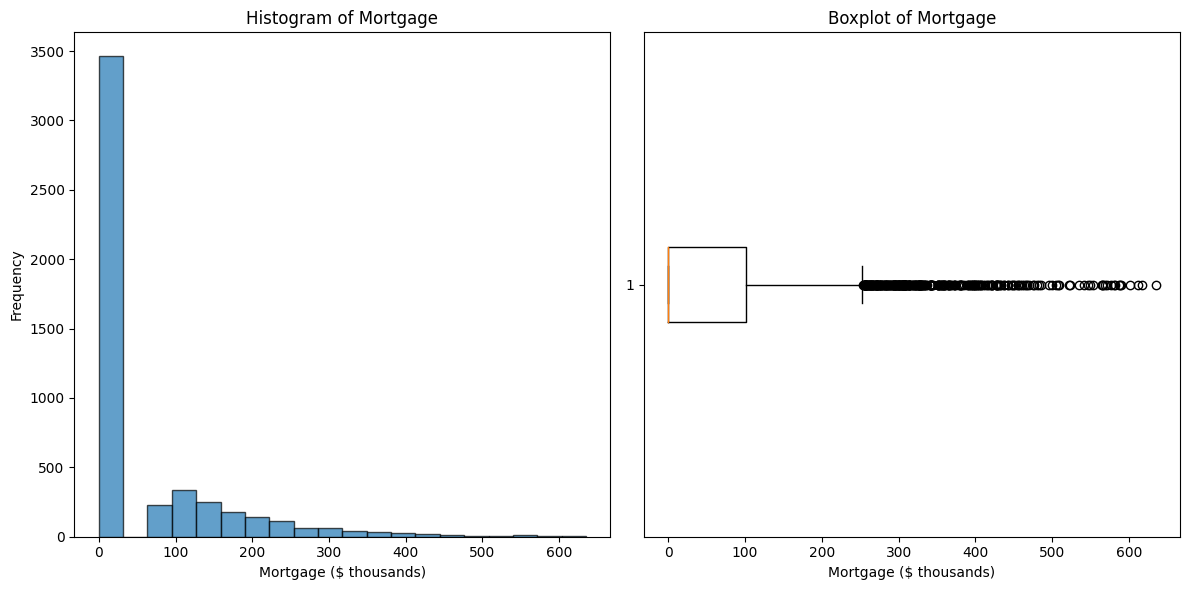

Zero Morgage Percentage= 69.24


In [31]:
# univariate analysis - Mortgage
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram for Mortgage
axes[0].hist(df['Mortgage'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Mortgage')
axes[0].set_xlabel('Mortgage ($ thousands)')
axes[0].set_ylabel('Frequency')

# Plotting the boxplot for Mortgage
axes[1].boxplot(df['Mortgage'], vert=False)
axes[1].set_title('Boxplot of Mortgage')
axes[1].set_xlabel('Mortgage ($ thousands)')

# Show the plots
plt.tight_layout()
plt.show()

#Calculate 0 mortgage
zero_mortgage_percentage = (df['Mortgage'] == 0).mean() * 100
print('Zero Morgage Percentage=',zero_mortgage_percentage)

* The `Morgage` distribution is `highly skewed`, with a significant peak at `0` indicating that many customers do not have a mortgage.
* Approximately `69.24%` of the customers have a `0` mortgage value.
* A small number of customers have higher mortgage values, which is showing up as outliers in the distribution.
* Median is `$0` and IQR is ranging from `$0 to $101,000` indicating that the majority have `no mortgage`.
* There are several high-value outliers with some customers having mortgage amounts as high as `$635,000`.

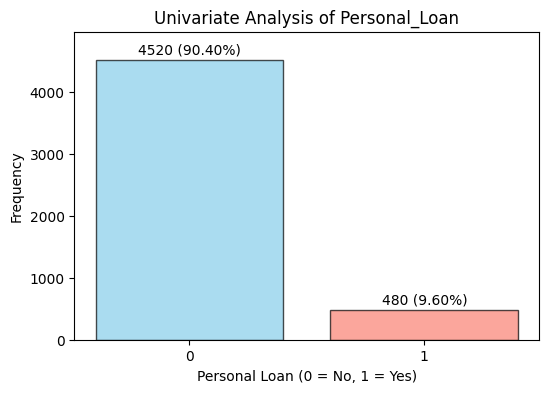

In [32]:
# univariate analysis - Personal_Loan
personal_loan_counts = df['Personal_Loan'].value_counts()

# Create the bar chart for Personal_Loan
plt.figure(figsize=(6, 4))
plt.bar(personal_loan_counts.index, personal_loan_counts.values, color=['skyblue', 'salmon'], edgecolor='black', alpha=0.7)
plt.title('Univariate Analysis of Personal_Loan')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1])

# Set the Y-limit slightly above the maximum count to avoid overlap
plt.ylim(0, max(personal_loan_counts.values) * 1.1)

# Adding the counts on top of the bars
total = sum(personal_loan_counts.values)  # Calculate total for percentage
for i, count in enumerate(personal_loan_counts.values):
    percentage = (count / total) * 100
    plt.text(personal_loan_counts.index[i], count + 100,  f'{count} ({percentage:.2f}%)', ha='center')

plt.show()

* The majority of customers in the dataset do not have a personal loan as indicated by a `significantly higher count` for `Personal_Loan = 0`.
* Approximately `4250 customers` (`90.4%`) do not have a personal loan and around `480 customers` (`9.6%`) have taken a personal loan.
* The variable is `highly imbalanced`, with far more customers `not taking` personal loans compared to those who have.

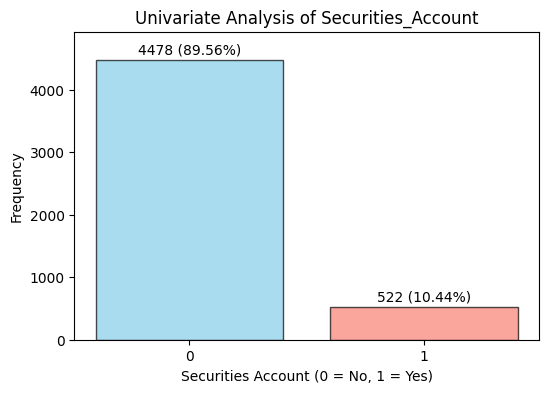

In [33]:
# univariate analysis - Securities_Account
securities_account_counts = df['Securities_Account'].value_counts()

# Create the bar chart for Securities_Account
plt.figure(figsize=(6, 4))
plt.bar(securities_account_counts.index, securities_account_counts.values, color=['skyblue', 'salmon'], edgecolor='black', alpha=0.7)
plt.title('Univariate Analysis of Securities_Account')
plt.xlabel('Securities Account (0 = No, 1 = Yes)')
plt.ylabel('Frequency')

# Set the Y-limit slightly above the maximum count to avoid overlap
plt.ylim(0, max(securities_account_counts.values) * 1.1)

# Adjusting the x-axis ticks to show only 0 and 1
plt.xticks([0, 1])
# Adding the counts on top of the bars
total = sum(securities_account_counts.values)  # Calculate total for percentage
for i, count in enumerate(securities_account_counts.values):
    percentage = (count / total) * 100
    plt.text(securities_account_counts.index[i], count + 100,f'{count} ({percentage:.2f}%)', ha='center')

plt.show()

* Majority of customers `do not` have Securities Account as indicated in the graph.
* Around `4480 customers` (`89.6%`) do not have a securities account and only about `520 customers` (`10.4%`) have a  securities account.
* Similar to the `Person_Loan` variable, the data is `imbalanced` with the `majority` of customers `not holding` a securities account.

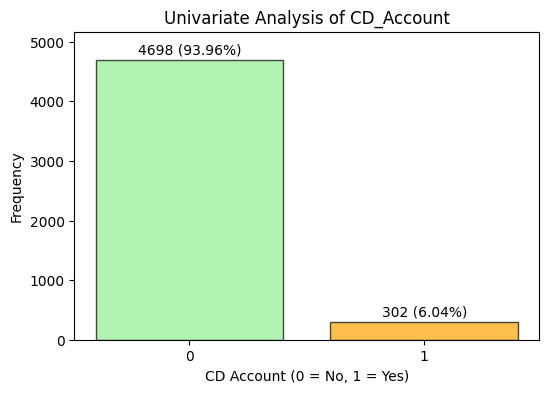

In [34]:

# univariate analysis - CD_Account
cd_account_counts = df['CD_Account'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(cd_account_counts.index, cd_account_counts.values, color=['lightgreen', 'orange'], edgecolor='black', alpha=0.7)
plt.title('Univariate Analysis of CD_Account')
plt.xlabel('CD Account (0 = No, 1 = Yes)')
plt.ylabel('Frequency')

# Set the Y-limit slightly above the maximum count to avoid overlap
plt.ylim(0, max(cd_account_counts.values) * 1.1)

# Adjusting the x-axis ticks to show only 0 and 1
plt.xticks([0, 1])

# Adding the counts on top of the bars
total = sum(cd_account_counts.values)  # Calculate total for percentage
for i, count in enumerate(cd_account_counts.values):
    percentage = (count / total) * 100
    plt.text(cd_account_counts.index[i], count + 100, f'{count} ({percentage:.2f}%)', ha='center')

plt.show()

* `Majority` of customers `do not` have CD accounts.
* Around `4700 customers` (`94%`) do not have a CD account and only about `300 customers` (`6%`) have a CD account.

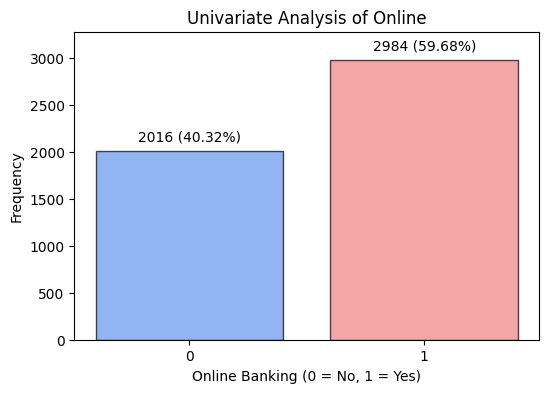

In [35]:

# univariate analysis - Online
online_counts = df['Online'].value_counts()

# Create the bar chart for Online
plt.figure(figsize=(6, 4))
plt.bar(online_counts.index, online_counts.values, color=['lightcoral', 'cornflowerblue'], edgecolor='black', alpha=0.7)
plt.title('Univariate Analysis of Online')
plt.xlabel('Online Banking (0 = No, 1 = Yes)')
plt.ylabel('Frequency')

# Set the Y-limit slightly above the maximum count to avoid overlap
plt.ylim(0, max(online_counts.values) * 1.1)

# Adjusting the x-axis ticks to show only 0 and 1
plt.xticks([0, 1])

# Adding the counts on top of the bars
total = sum(online_counts.values)  # Calculate total for percentage
for i, count in enumerate(online_counts.values):
    percentage = (count / total) * 100
    plt.text(online_counts.index[i], count + 100,  f'{count} ({percentage:.2f}%)', ha='center')

plt.show()

* A larger portion of customers use online banking compared to those who do not.
* Around `2984 customers` (`59.7%`) use online banking.
* Around `2016 customers` (`40.3%`) do not use online banking.
* The `Online` variable is more `balanced` with a relatively even split between those `who use` vs `who do not use` online banking.

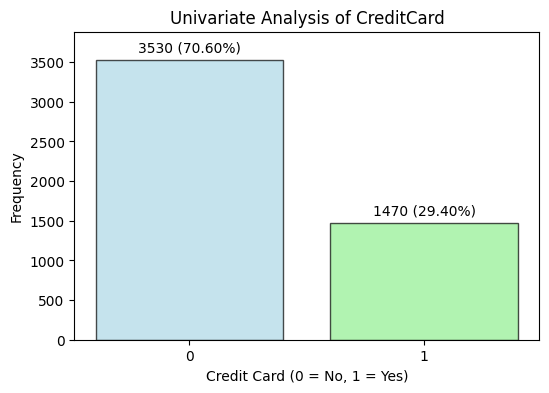

In [36]:

# univariate analysis - CreditCard
creditcard_counts = df['CreditCard'].value_counts()

# Create the bar chart for CreditCard
plt.figure(figsize=(6, 4))
plt.bar(creditcard_counts.index, creditcard_counts.values, color=['lightblue', 'lightgreen'], edgecolor='black', alpha=0.7)
plt.title('Univariate Analysis of CreditCard')
plt.xlabel('Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Frequency')

# Set the Y-limit slightly above the maximum count to avoid overlap
plt.ylim(0, max(creditcard_counts.values) * 1.1)

# Adjusting the x-axis ticks to show only 0 and 1
plt.xticks([0, 1])

# Adding the counts on top of the bars
total = sum(creditcard_counts.values)  # Calculate total for percentage
for i, count in enumerate(creditcard_counts.values):
    percentage = (count / total) * 100
    plt.text(creditcard_counts.index[i], count + 100,  f'{count} ({percentage:.2f}%)', ha='center')

plt.show()

* `Larger` proportion of customers `do not` use a credit cards from other banks.
* A total of `1,472 customers` (`29.4%`) have credit cards issues by other banks and `3528 customers` (`70.6%`) do not use a credit card.
* The `CreditCard` variable shows an `imbalance` with the `majority` of customers `not` using a credit card.

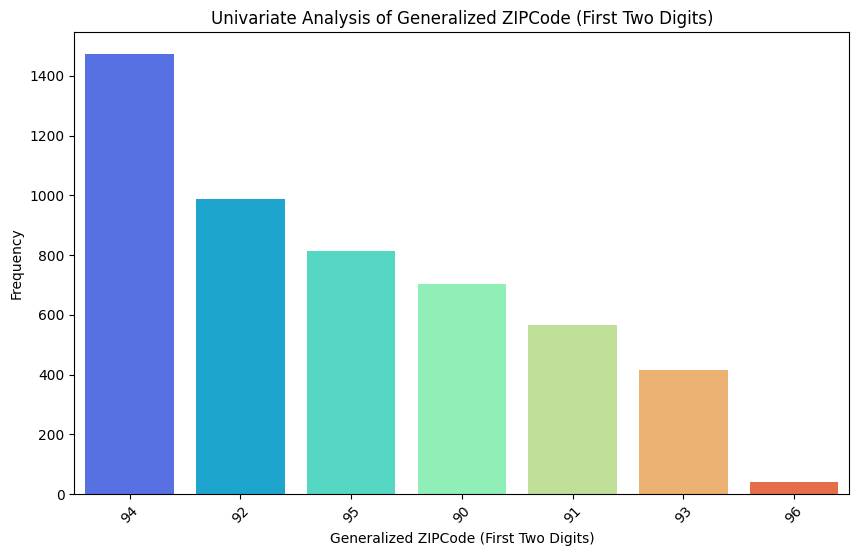

In [37]:

# univariate analysis - ZIPCode
plt.figure(figsize=(10, 6))
sns.countplot(x='ZIPCode', data=df, order=df['ZIPCode'].value_counts().index, palette='rainbow')
plt.title('Univariate Analysis of Generalized ZIPCode (First Two Digits)')
plt.xlabel('Generalized ZIPCode (First Two Digits)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

* Certain zip codes have `more customers` than other zip codes.
* Some regions are `dominant`, meaning a significant portion of customers are located in `only` a `few ZIP code areas`, which could indicate key markets for the bank.

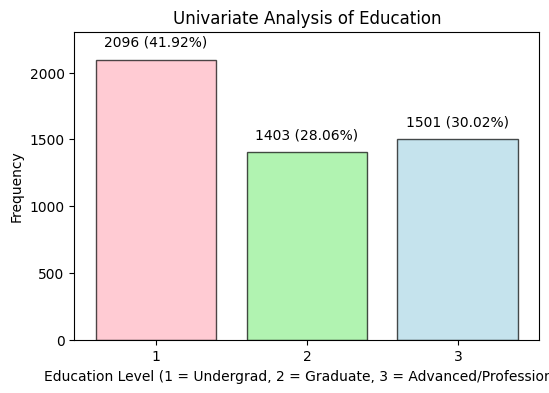

In [38]:

# univariate analysis - Education
education_counts = df['Education'].value_counts()

# Create the bar chart for Education
plt.figure(figsize=(6, 4))
plt.bar(education_counts.index, education_counts.values, color=['lightpink', 'lightblue', 'lightgreen'], edgecolor='black', alpha=0.7)
plt.title('Univariate Analysis of Education')
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Frequency')

# Set the Y-limit slightly above the maximum count to avoid overlap
plt.ylim(0, max(education_counts.values) * 1.1)

# Adding the counts on top of the bars
total = sum(education_counts.values)  # Calculate total for percentage
for i, count in enumerate(education_counts.values):
    percentage = (count / total) * 100
    plt.text(education_counts.index[i], count + 100, f'{count} ({percentage:.2f}%)', ha='center')

plt.xticks([1, 2, 3])

plt.show()


* Distribution of `Education` is relatively balanced across three education levels with a larger group of customers having completed an undergraduate degree (`Education = 1`).
* Around `2096` customers (`42%`) have an undergraduate degree, around `1501 customers` (`30%`) have completed graduate studies and `1403 customers`(`28%`) have an advanced degree or professional degree.

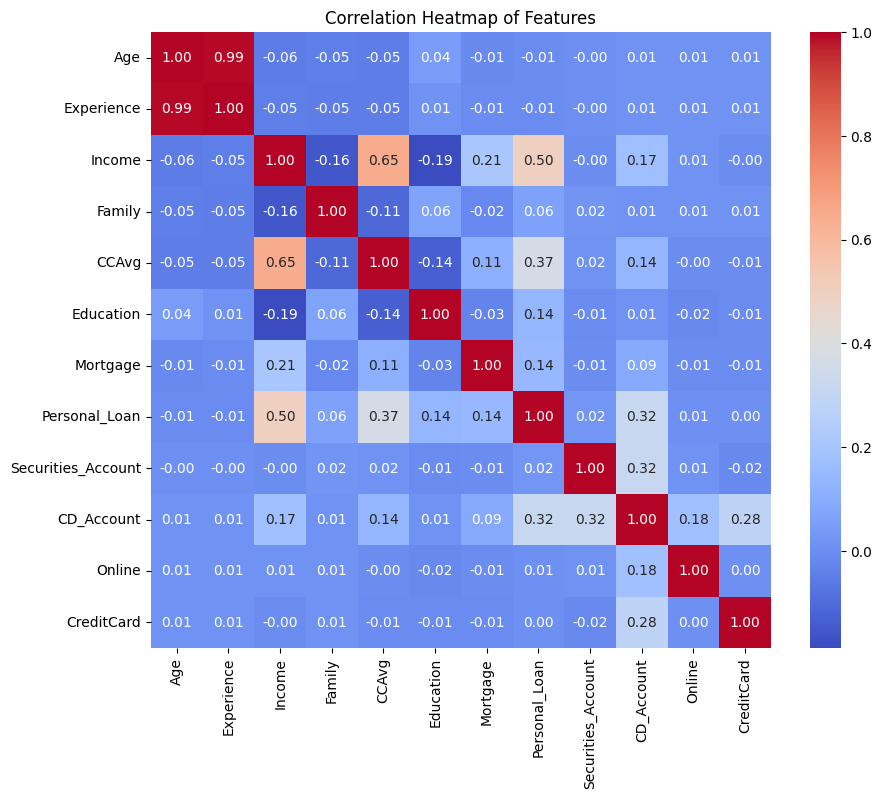

In [39]:
# bivariate analysis - correlation between all features and the target variable Personal_Loan
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

* `Income`, `CCAvg`, `Education`, and `Family` show positive correlations with the Personal_Loan attribute. These attributes are likely to play a significant role in predicting loan acceptance.

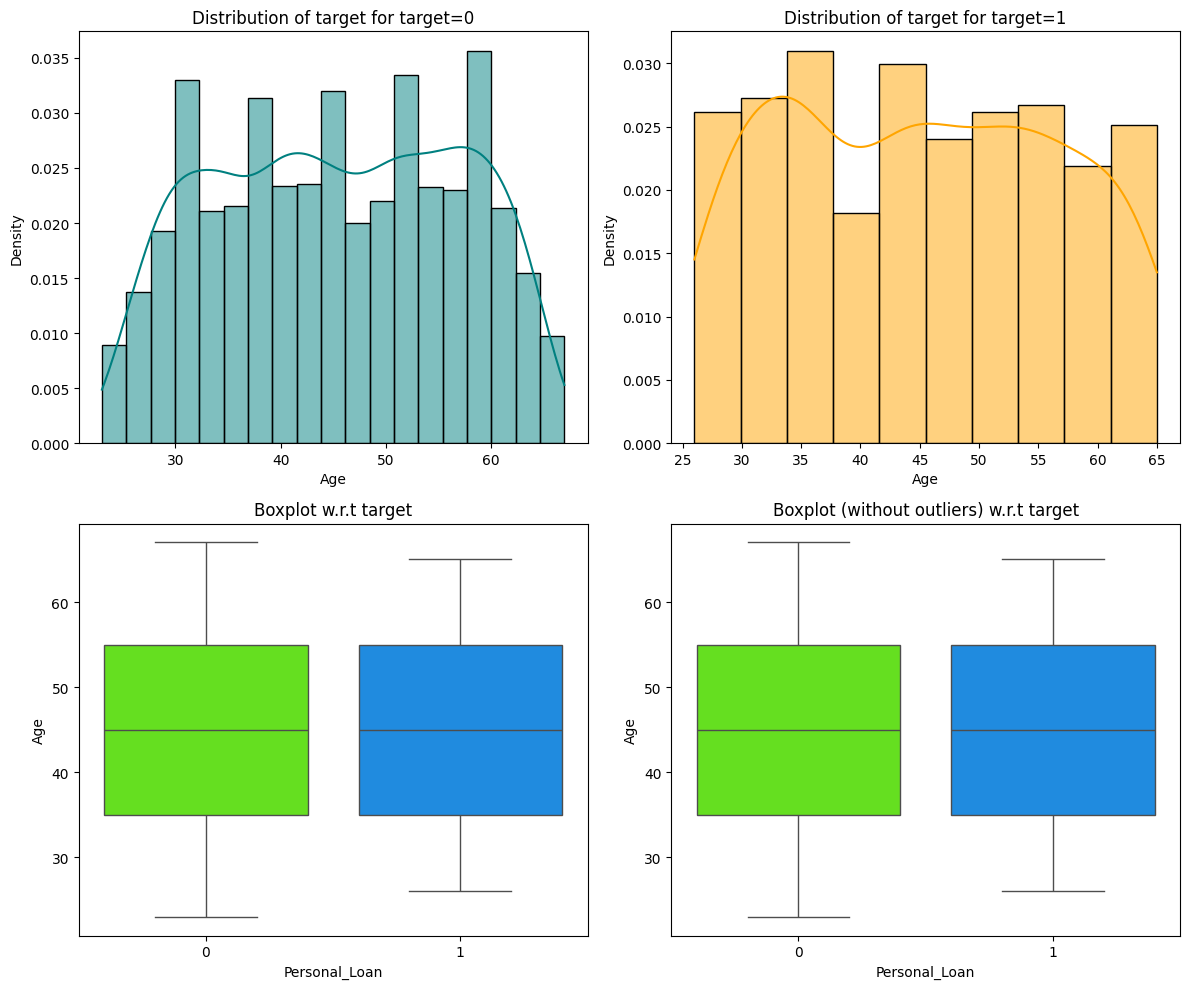

In [40]:
# bivariate analysis - Loan purchase by Age
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

* Customers who did not accept the personal loan show a relatively uniform distribution of age, with a slight peak around the `30-50 years` age range.
* Customers who accepted the personal loan tend to cluster more around the `30-50 year` age range, indicating a higher likelihood of loan acceptance within the age group.
* Younger customers (`below 30`) and older customers (`above 60`) seem less likely to take a loan.
* The boxplots show a slightly wider spread for customers who did not accept the personal loan, but the median age is relatively close for both groups.
* When the outliers are removed, the central tendency remains the same, with a narrower spread for both groups.
* The analysis suggests that `Age` is a `relevant factor` in predicting personal loan acceptance.

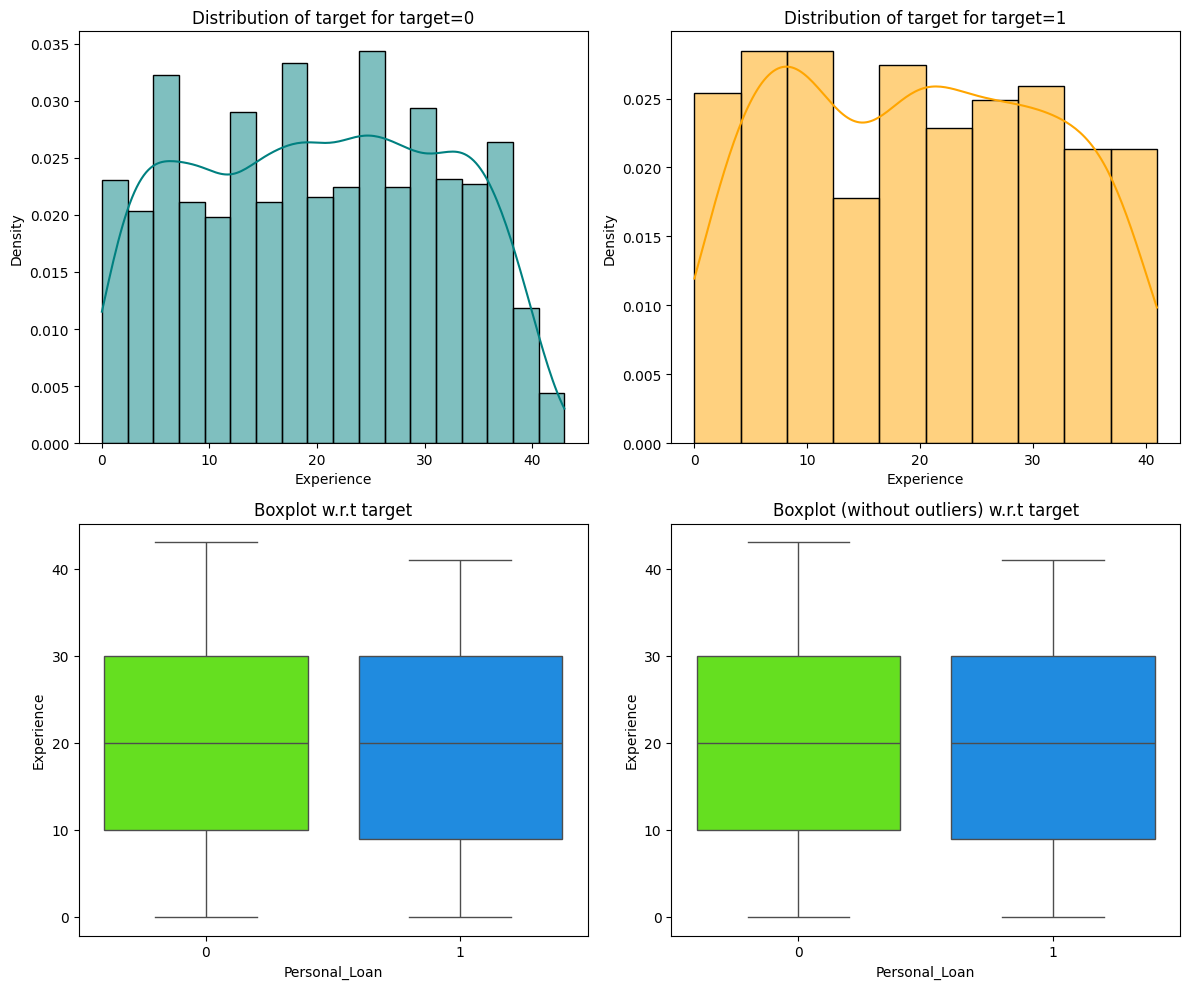

In [41]:
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

* Customers who `did not` accept the personal loan have a fairly uniform distribution of experience, with a slight peak between `10 and 30 years` of experience.
* Customers who accepted the personal loan tend to concentrate more around the `10-30 years` of experience range similar to the distribution for `Age`. This suggests that customers with `moderate work experience` are `more` likely to take personal loans.
* Those with very little experience (below `10 years`) and those with extensive experience (above `30 years`) seem less likely to accept a personal loan.
* The boxplots show that customers who did not accept the loan have a `slightly wider range` of experience, while those who accepted the loan have a more compact range, centred around the `10-30 year` experience mark.
* When outliers are removed, the distribution is still concentrated in the same range.
* The analysis suggests that experience plays a role similar to `Age` in predicting personal loan.

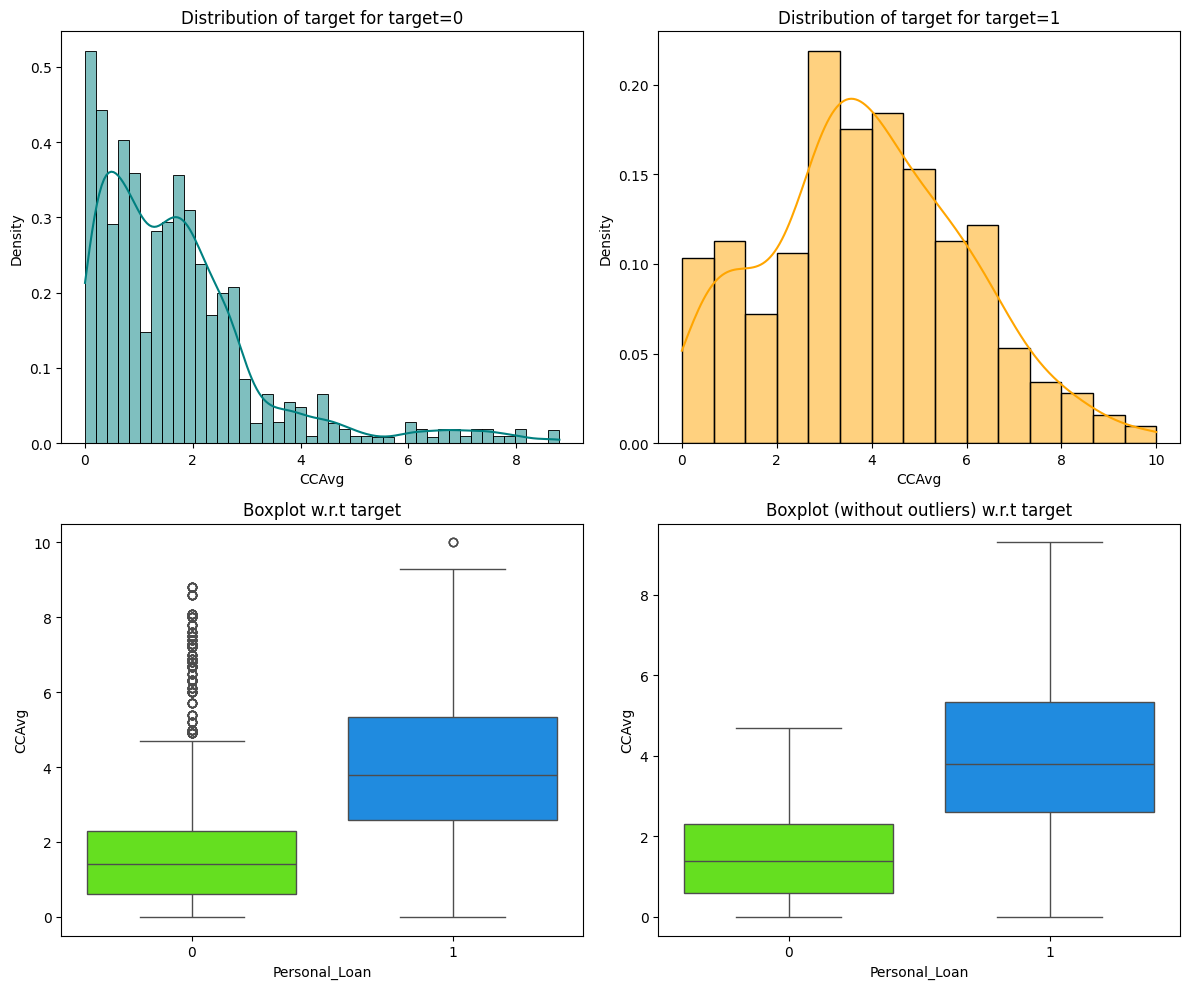

In [42]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

* Customers who did not accept the loan tend to have lower credit card spending. The distribution is concentrated primarily between `$0` and `$2,000`, with few customers spending more than that.
* Customers who accepted the personal loan show a `clear shift` toward `higher credit card spending`. The distribution peaks around `$2,000` to `$5,000` with a significant number of customers spending more than `$3,000` per month on average.
* This distinction between low and high credit card spending makes `CCAvg` a `strong indicator` of loan experience.
* The boxplot clearly shows that customers who accepted the personal loan have a much higher median credit card spending compared to those who did not.
* When outliers are removed, the difference between the two groups remains prominent.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


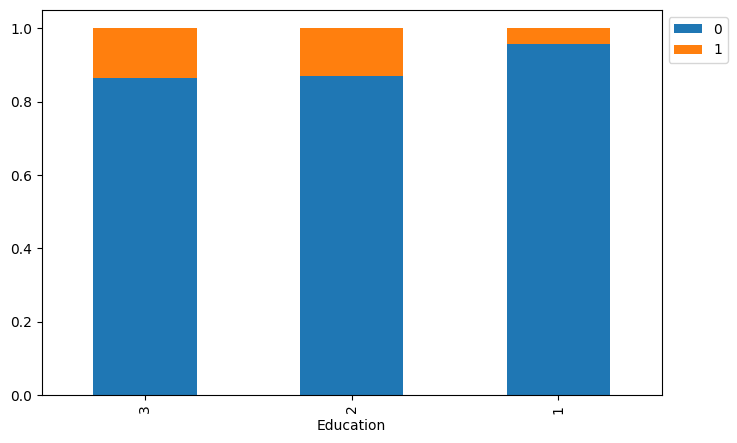

In [43]:
# bivariate analysis - Loan purchase by Education
stacked_barplot(df, "Education", "Personal_Loan")


**Education level1:**
* The `majority` of customers with an undergraduate degree `did not` accept the personal loan (`2003 out of 2096`)
* Only a small fraction (`93`) of undergraduate customers accepted the loan.

**Education Level2:**
* Graduate-level customers also show a `higher count` of `non-loan takers` (`1221` out of `1403`).
* However, the acceptance rate is `higher` for graduates compared to undergraduates with `182` customers accepting the loan.

**Education Level3:**
* Customers with an advanced or professional degree have the highest loan acceptance rate.
* Out of `1501` customers, `205` customers have accepted the loan, which is a higher proportion compared to the other education levels.

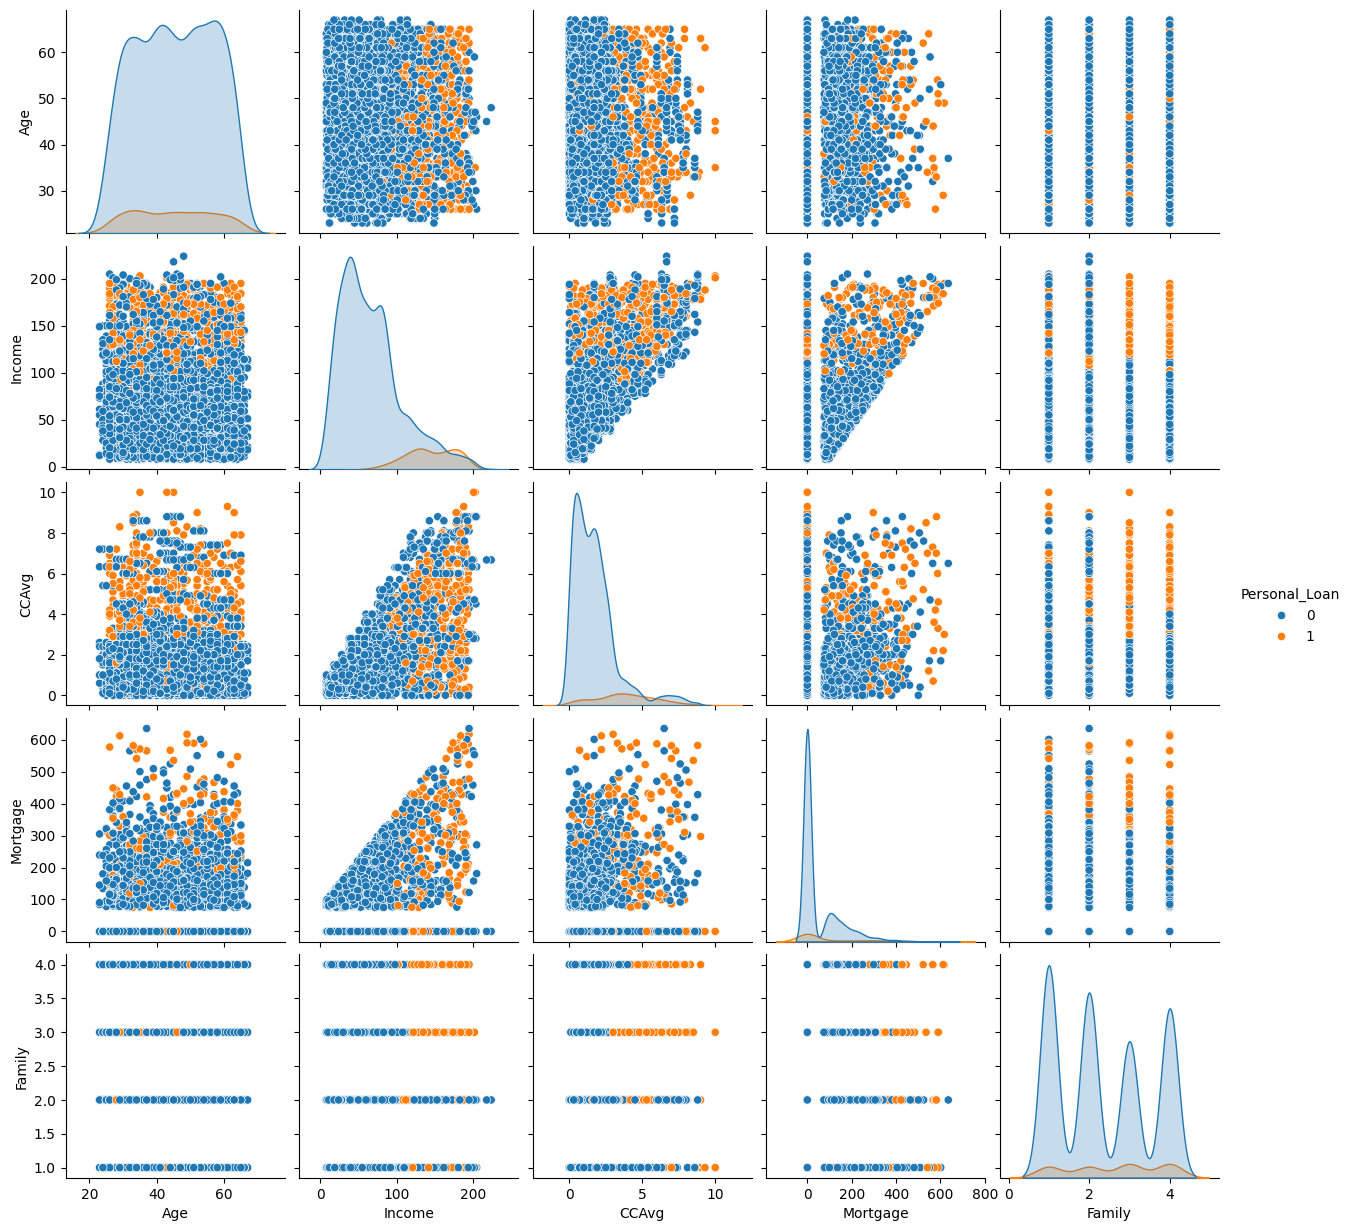

In [44]:
# bivariate analysis - Pairplot for all numerical features
sns.pairplot(df, hue="Personal_Loan", vars=["Age", "Income", "CCAvg", "Mortgage", "Family"])
plt.show()

* Customers with `higher income` and `higher credit card spending` are more likely to accept loans.
* The relationship between `Personal_Loan` is less clear with respect to `Mortgage` but a `slight positive` trend may be visible for customers with `larger` mortgages.
* Family size `does not` have a `strong` visible trend with loan acceptance.


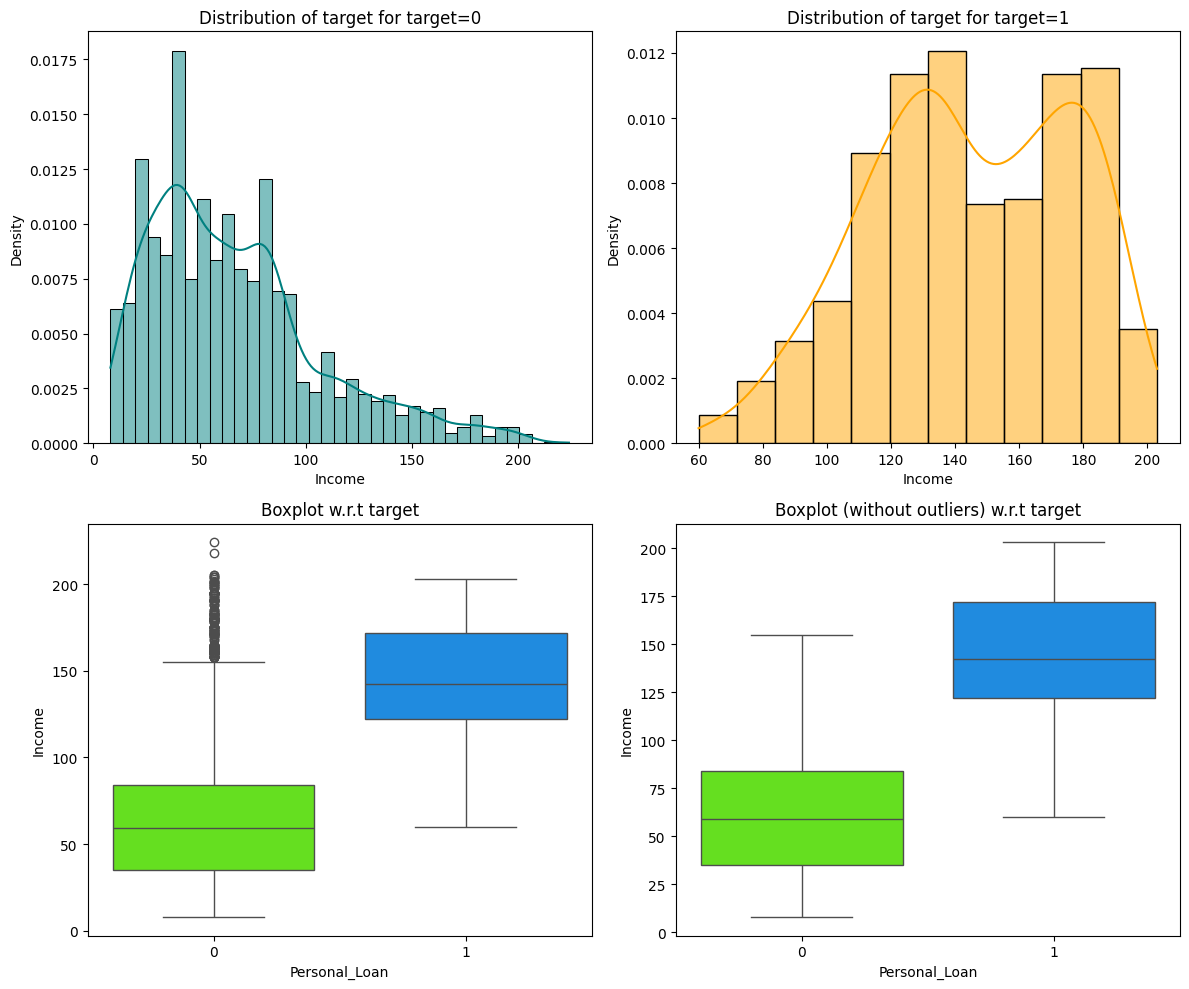

In [45]:
# bivariate analysis - Income vs Loan Acceptance
distribution_plot_wrt_target(df,'Income','Personal_Loan')

* Customers who did not accept the personal loan (`Personal_Loan = 0`) have a more concentrated distribution around lower income levels, particularly below `$100,000`.
* Customers who accepted the personal loan (`Personal_Loan = 1`) have a clear shift toward `higher income` levels. The distribution shows that individuals earning between `$100,000` and `$200,000` are much more likely to accept personal loans.
* The income level appears to be a strong differentiator between those who take personal loans and those who do not.
* The boxplot shows a significant difference in the median income between the two groups. Customers who accepted the personal loan have a `much higher median income` compared to those who `did not`.
* When outliers are removed, the difference remains prominent, reinforcing the observation that `higher-income individuals` are `more likely` to accept loans.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


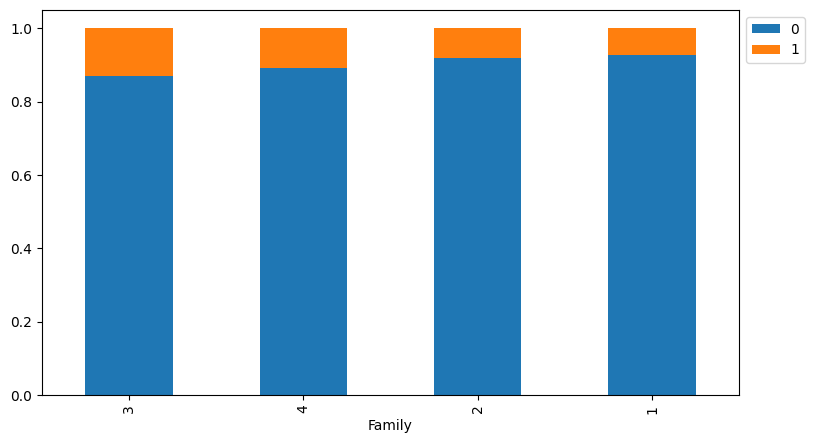

In [46]:
# bivariate analysis - Loan Purchase by Family Size
stacked_barplot(df, "Family", "Personal_Loan")

**Family Size 4:**
* Families with `4 members` have the highest number of loan acceptances, with `134` customers accepting the loan out of `1222`.
* This group also has a significant number of customers who did not accept the loan (`1088`).

**Family Size 3:**
* Family size `3` shows a relatively balanced acceptance rate, with `133` customers accepting the loan out of `1010` total. This represents a higher acceptance rate compared to smaller families.

**Family Size 1 and 2:**
* Families with `1` or `2 members` have lower loan acceptance rates compared to larger families. For instance, only `107` customers with a family size of `1` accepted the loan, while `106` customers with a family size of `2` accepted it.
* A significant portion of these smaller families did not accept the loan.

Larger families (`3` or `4 members`) show a higher likelihood of accepting personal loans compared to smaller families. Family size may play a role in loan acceptance behavior, with larger families being more inclined to take personal loans.


Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


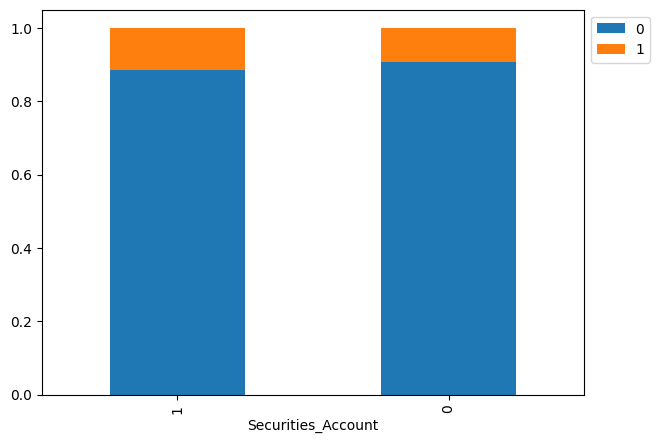

In [47]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

**Customers Without a Securities Account:**
* The `majority` of customers do not have a securities account, and a significant portion of them did not accept the personal loan. Out of `4478 customers` without a securities account, `420` accepted the loan.

**Customers With a Securities Account:**
* Customers with a securities account are less likely to take out a personal loan. Out of `522 customers` with a securities account, `60 customers` accepted the loan, indicating a `lower acceptance` rate compared to those `without` a securities account.

Customers with a securities account appear to be `less inclined` to take personal loans compared to those `without` one. This suggests that the presence of a securities account might reduce the likelihood of personal loan acceptance.


Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


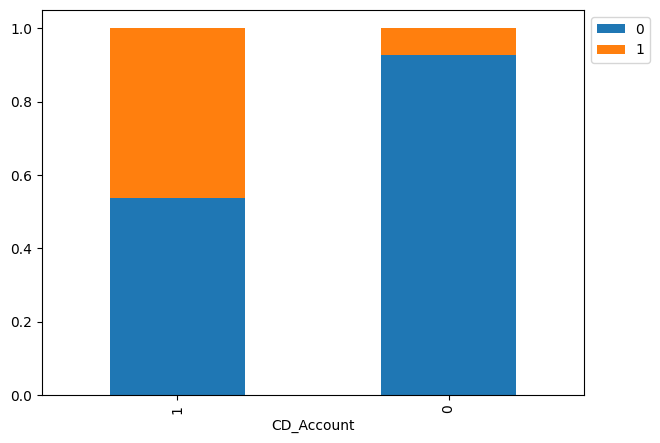

In [48]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

**Customers Without a CD Account:**
* The vast majority of customers do not have a CD account, and most of them did not accept the personal loan. Out of `4698` customers without a CD account, `340` accepted the loan, indicating a lower acceptance rate.

**Customers With a CD Account**
* Customers with a CD account show a much higher loan acceptance rate. Out of `302` customers with a CD account, `140` accepted the loan, which is a significant proportion compared to those without a CD account.

Having a CD account seems to be strongly associated with a higher likelihood of accepting a personal loan. Customers with a CD account are more likely to accept a loan compared to those without one.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


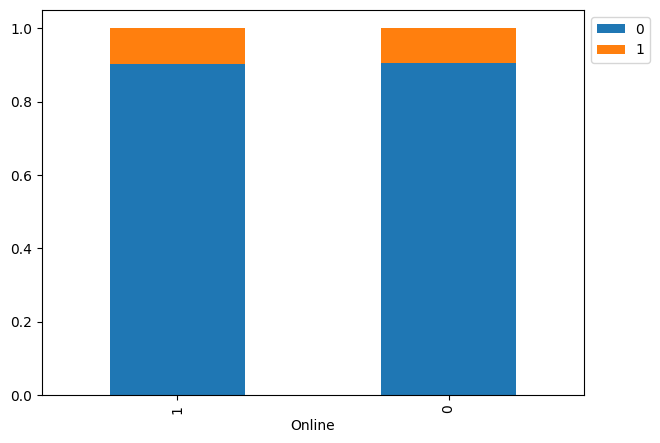

In [49]:
stacked_barplot(df, "Online", "Personal_Loan")

**Customers Who Use Online Banking:**
* Out of `2984 customers` who use online banking, `291 customers` accepted the personal loan, indicating a `relatively higher` acceptance rate compared to those who `do not` use online banking.

**Customers Who Do Not Use Online Banking:**
* Among the `2016 customers` who do not use online banking, `189 customers` accepted the personal loan. This shows that the acceptance rate is `lower` for customers who do not use online banking.

Customers who use online banking services are `more likely to accept` personal loans compared to those who do not. Online banking usage could be a significant factor in predicting personal loan acceptance.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


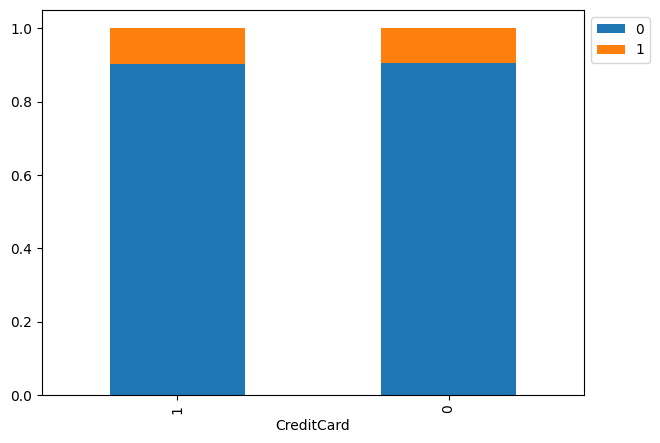

In [50]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

**Customers Without a Credit Card:**
* The majority of customers do not use credit cards from other banks, and out of `3530 customers`, `337 customerer` accepted the personal loan. This indicates a relatively `lower acceptance` rate compared to those with a credit card.

**Customers With a Credit Card:**
* Among the `1470 customers` who use credit cards from other banks, `143` accepted the personal loan. This shows a `slightly higher acceptance rate` compared to customers without a credit card from another bank.

Customers who use credit cards issued by other banks are somewhat `more likely` to accept personal loans compared to those who do not. Credit card usage outside the bank could be an indicator of higher engagement with financial products and services.

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


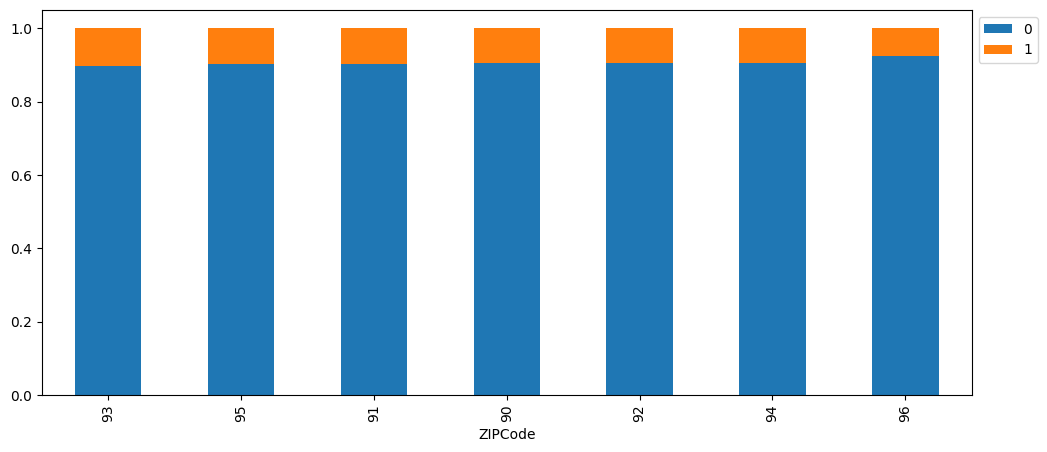

In [51]:
# bivariate analysis - Loan Purchase by ZIPCode
stacked_barplot(df, "ZIPCode", "Personal_Loan")

* ZIP codes like `94`, `92`, and `95` have the highest number of loan acceptances (`138`, `94`, and `80` respectively).
* The number of loan acceptances in smaller regions like `96` is very low (only 3), which might suggest fewer customers in these areas, possibly skewing the acceptance rates.
* ZIP code `94` has `138` loan acceptances out of `1472` customers, which gives an acceptance rate of about `9.4%`.
* ZIP code `92` has `94` loan acceptances out of `988` customers, which gives an acceptance rate of `9.5%`.
* ZIP code `95` has `80` loan acceptances out of `815` customers, resulting in an acceptance rate of `9.8%`.
* ZIP code `96` has only 3 acceptances out of `40` customers, but due to the small number of customers, the acceptance rate (`7.5%`) may not be fully representative.


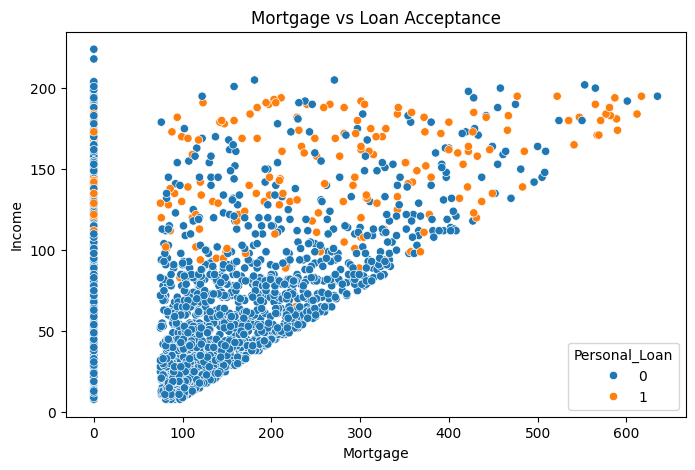

In [52]:
# bivariate analysis - Mortgage vs. Loan Acceptance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mortgage', y='Income', hue='Personal_Loan', data=df)
plt.title('Mortgage vs Loan Acceptance')
plt.xlabel('Mortgage')
plt.ylabel('Income')
plt.show()

* Customers who accepted the personal loan (shown in a distinct color) generally have `higher incomes`. There is a `visible clustering` of loan acceptors in the `upper ranges` of income, even for customers with smaller or no mortgage values.
* There is `no clear pattern` of `higher mortgage values` being linked to loan acceptance. Many customers who accepted the loan have low or no mortgage, indicating that mortgage size might not be a strong predictor of personal loan acceptance on its own.
* Customers in the lower-income range appear less likely to accept a personal loan, regardless of their mortgage status.

The scatterplot suggests that `Income` is a `stronger factor` in loan acceptance than mortgage value. Customers with higher incomes are more likely to accept personal loans, even if they have a low or no mortgage.

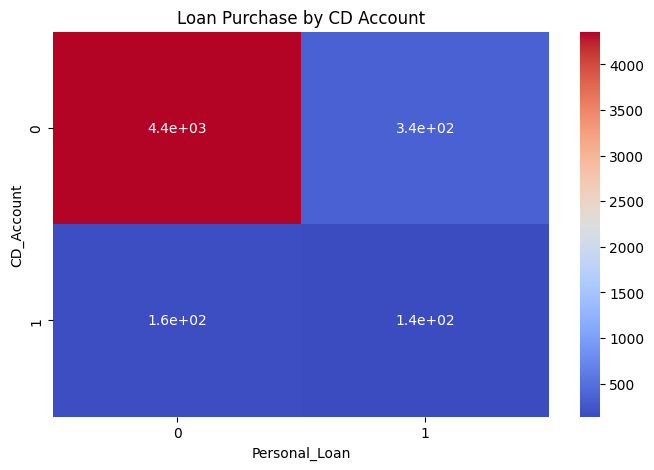

In [53]:
# bivariate analysis - Heatmap for categorical variables
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df['CD_Account'], df['Personal_Loan']), annot=True, cmap="coolwarm")
plt.title('Loan Purchase by CD Account')
plt.show()

* The majority of customers do not have a CD account (`4698 customers`), and most of them did not accept the loan (`4358 customers`). However, a relatively small portion (`340 customers`) did accept the loan.
* A significant proportion of customers with a CD account accepted the personal loan (`140 out of 302`). This suggests that having a CD account is strongly associated with a higher likelihood of personal loan acceptance.

The heatmap clearly shows that customers with a CD account are more likely to accept personal loans compared to those without. This could indicate that customers with CD accounts may be more financially engaged and open to loan products.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [54]:
# outlier detection and treatment
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Treating outliers by capping them within lower and upper bounds
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df[column]

# List of numerical columns to perform outlier treatment
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Apply the IQR method to each numerical column
for col in numerical_columns:
    df[col] = treat_outliers_iqr(df, col)

# Display the treated dataframe
df[numerical_columns].describe()

Age   Experience       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    20.134600    73.617400     1.831338    50.494700
std      11.463166    11.415189    45.626122     1.452215    83.005401
min      23.000000     0.000000     8.000000     0.000000     0.000000
25%      35.000000    10.000000    39.000000     0.700000     0.000000
50%      45.000000    20.000000    64.000000     1.500000     0.000000
75%      55.000000    30.000000    98.000000     2.500000   101.000000
max      67.000000    43.000000   186.500000     5.200000   252.500000

Summary of treated data:
* The `Age` range is now capped between `23 and 67` years.
* `Experience` values are capped between `0 and 43` years.
* The `Income` range has been adjusted to a maximum of `$186,500`.
* The `CCAvg` (average credit card) spending per month is capped at `$5,200`.
* The `Mortgage` values have been capped at `$252,500`.
* `CCAvg` range is now capped between `0 and 5.2` removing any `extreme high` spenders.

### Data Preparation for Modeling

In [55]:
# Model Building
df.drop(['ZIPCode'], axis=1, inplace=True)

# split the data into features and target variable
X = df.drop(columns='Personal_Loan')  # Features
y = df['Personal_Loan']  # Target variable

# train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* The class proportions for the target variable `Personal_Loan` shows a significant imbalance between the classes (0: No Loan, 1: Loan).
* Training set has `90.54% of customers` did not take the loan and `9.46% of customers` took the loan.
* Test set has `90.07% of customers` did not take the loan and `9.93% of customers` took the loan.


## Model Building

### Model Evaluation Criterion

**Model can make wrong prediction as:**
1. Predicting a customer will take the personal loan but in reality the customer does not take. This results in the bank spending resources on marketing to customers who are not interested in taking a loan.
2. Predicting a customer will not take the personal loan but in reality the customer will take the loan. This is more critical as the bank loses a potential customer and misses out on the loan revenue.

**Which case is more important?**
- Since the bank's goal is to identify potential customers who are highly likely to purchase a loan, missing a potential loan-taker (False Negative) can directly result in lost revenue. A high recall is crucial to minimize false negatives and ensure that the majority of customers who are inclined to take a loan are correctly identified.

**How to increase the customer base for taking personal loans?**

We are interested in the second prediction as AllLife Bank is looking to expand it's loan business and every customer who takes the personal loan is very important. Hence the False Negatives should be considerably low.

It is crucial to monitor **recall** for the minority class (1) to ensure the model correctly identifies a reasonable number of customers who would take the loan.

**Precision-recall** curves can also be useful when evaluating models in the context of imbalanced classes.


First, let's create functions to calculate different metrics and confusion matrix.

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Default Decision Tree**

In [58]:
# decision tree (default)
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

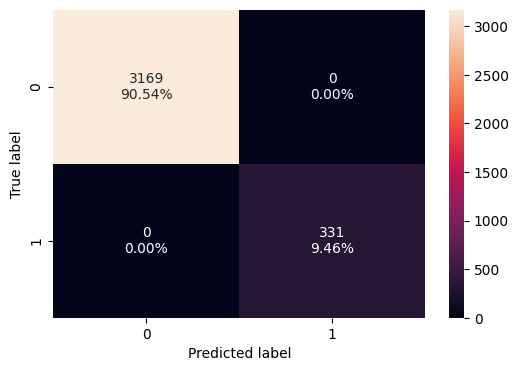

In [59]:
confusion_matrix_sklearn(model, X_train, y_train)

In [60]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

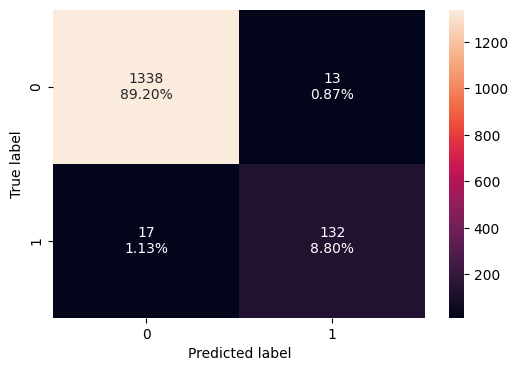

In [61]:
confusion_matrix_sklearn(model, X_test, y_test)

In [62]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.885906   0.910345  0.897959

**Confusion Matrix**

The **Training model**
- Correctly predicted `3169 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- `0` incorrect predictions for `False Positives` and `False Negatives`.
- Correctly predicted `331 customers` (`True Positive`) as accepting a loan (`Personal_Loan=1`).

The **Test model**
- Correctly predicted `1338 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- Incorrectly predicted that `13 customers` (`False Positive`) would accept the loan (`Personal_Loan = 1`) but they did not.
- `17 customers` would not accept the loan (`Personal_Loan = 0`), but they actually did.
- Correctly predicted `132 customers` who accepted the loan (`Personal_Loan = 1`).

**Performance**
* Training Accuracy is `100%`, suggesting `overfitting`.
* Test Accuracy is very high, but the difference between train and test accuracy confirms overfitting, so we need to prune the tree.

In [63]:
# print the feature names
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


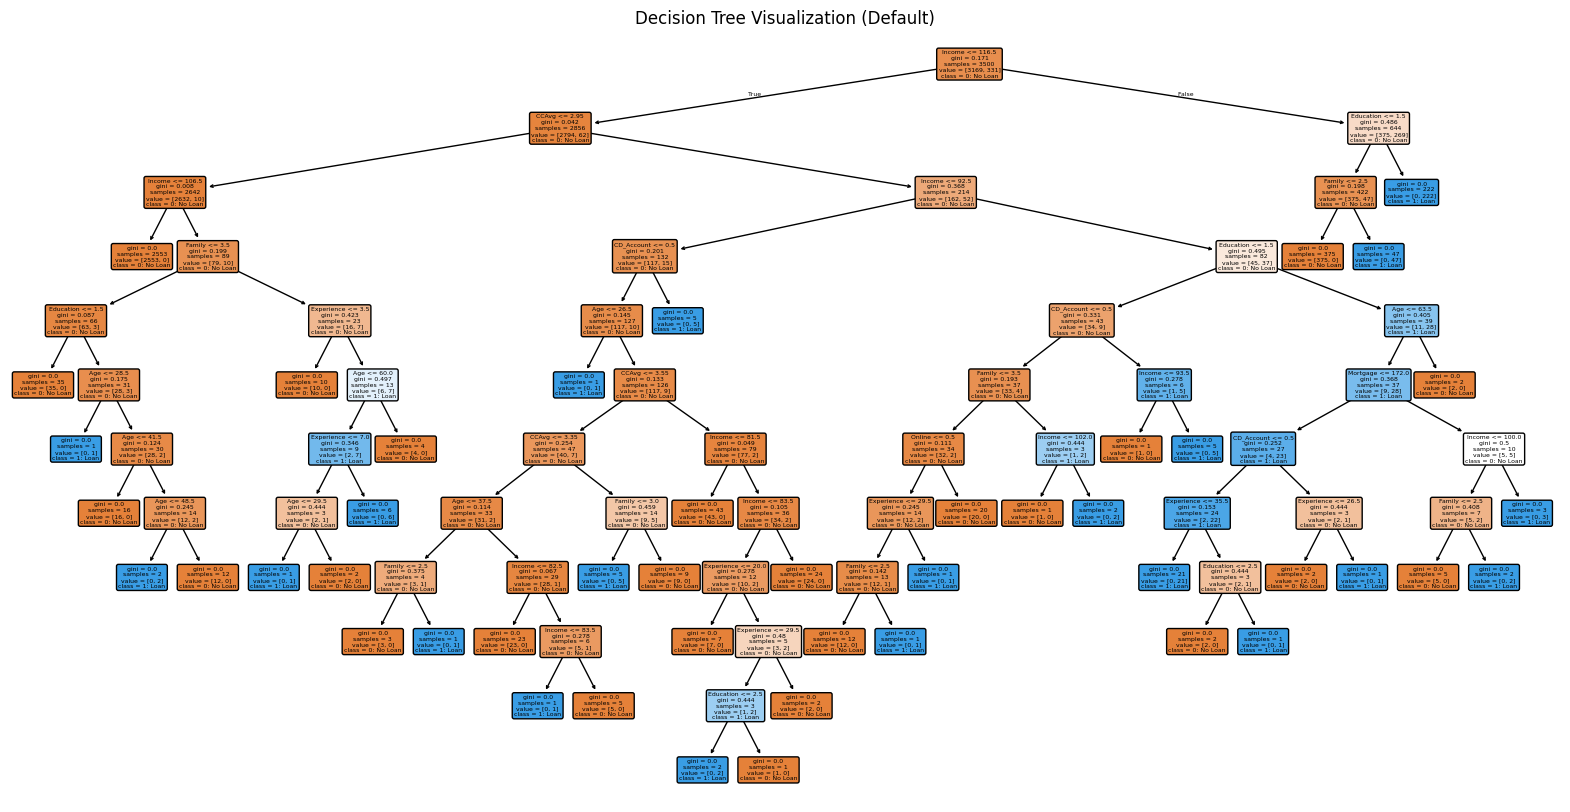

In [64]:
# visualize the decision tree
plt.figure(figsize=(20,10))
out = tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["0: No Loan", "1: Loan"], rounded=True)
plt.title('Decision Tree Visualization (Default)')
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()



In [65]:
# text report showing the rules of a decision tree

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience > 

* The tree is very deep, which confirms that the model is overfitting, capturing noise in the training data rather than generalizable patterns.

In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.405914
Income              0.310561
Family              0.167646
CCAvg               0.042183
CD_Account          0.025711
Age                 0.023880
Experience          0.020528
Mortgage            0.003014
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000


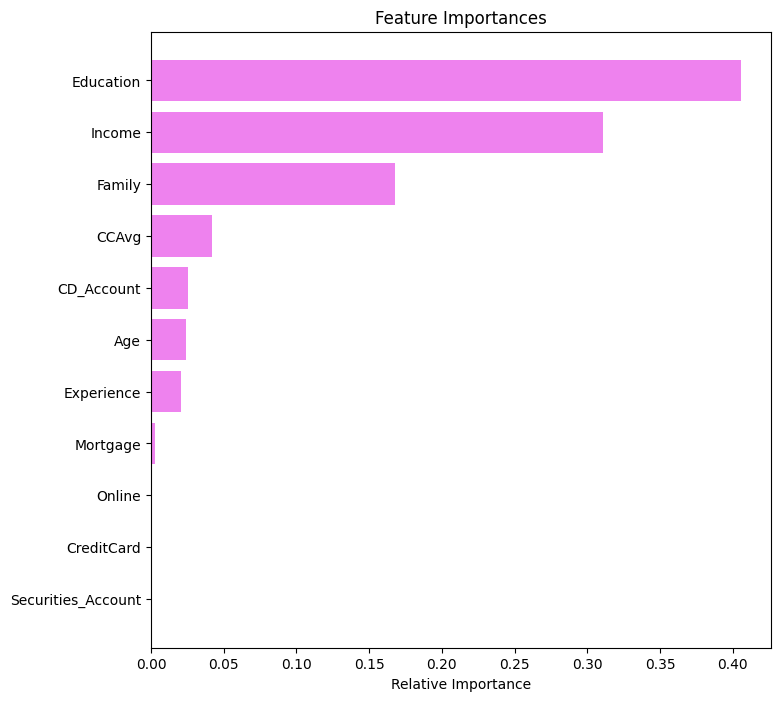

In [67]:
# plotting imortances
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The features `Education`, `Income` and `Family` are the important features from the Default Decision Tree Model.

**Decision Tree with Class Weights**

In [68]:
# decision tree (with class_weights)
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

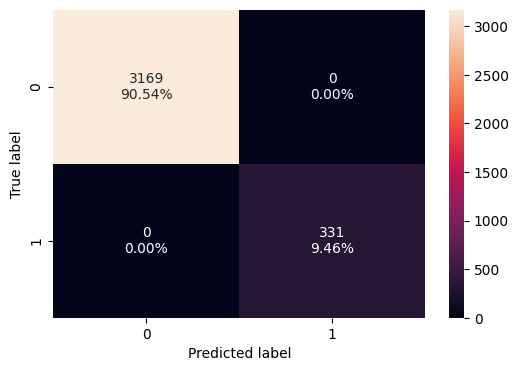

In [69]:
# confusion matrix for train model
confusion_matrix_sklearn(model1, X_train, y_train)

In [70]:
# performance for train set
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

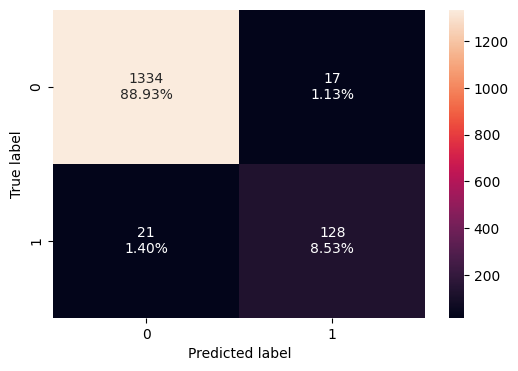

In [71]:
# confusion matrix for test model
confusion_matrix_sklearn(model1, X_test, y_test)

In [72]:
# performance of test model
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy   Recall  Precision        F1
0  0.974667  0.85906   0.882759  0.870748

**Confusion Matrix**
- The **Decision Tree with Class_weights training model** did not improve and it is same as `Default Decision Tree model`.

The **Test model**
- Correctly predicted `1334 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- Incorrectly predicted that `17 customers` (`False Positive`) would accept the loan (`Personal_Loan = 1`) but they did not.
- `21 customers` would not accept the loan (`Personal_Loan = 0`), but they actually did.
- Correctly predicted `128 customers` who accepted the loan (`Personal_Loan = 1`).

**Performance**

- Training Accuracy is `100%`, suggesting `overfitting`.
- The test set performance is quite strong with high accuracy, recall, and precision.
- There is a `small drop` in `recall` (`85.91%`) for test set performance compared to precision (`88.28%`), which indicates that the model misses some positive cases (`loan-takers`), but the false positive rate is relatively low.
- The `F1 score` (`87.07%`) for test set performance reflects a balanced trade-off between the two, making the model well-suited for this type of problem where both false positives and false negatives are important to minimize.

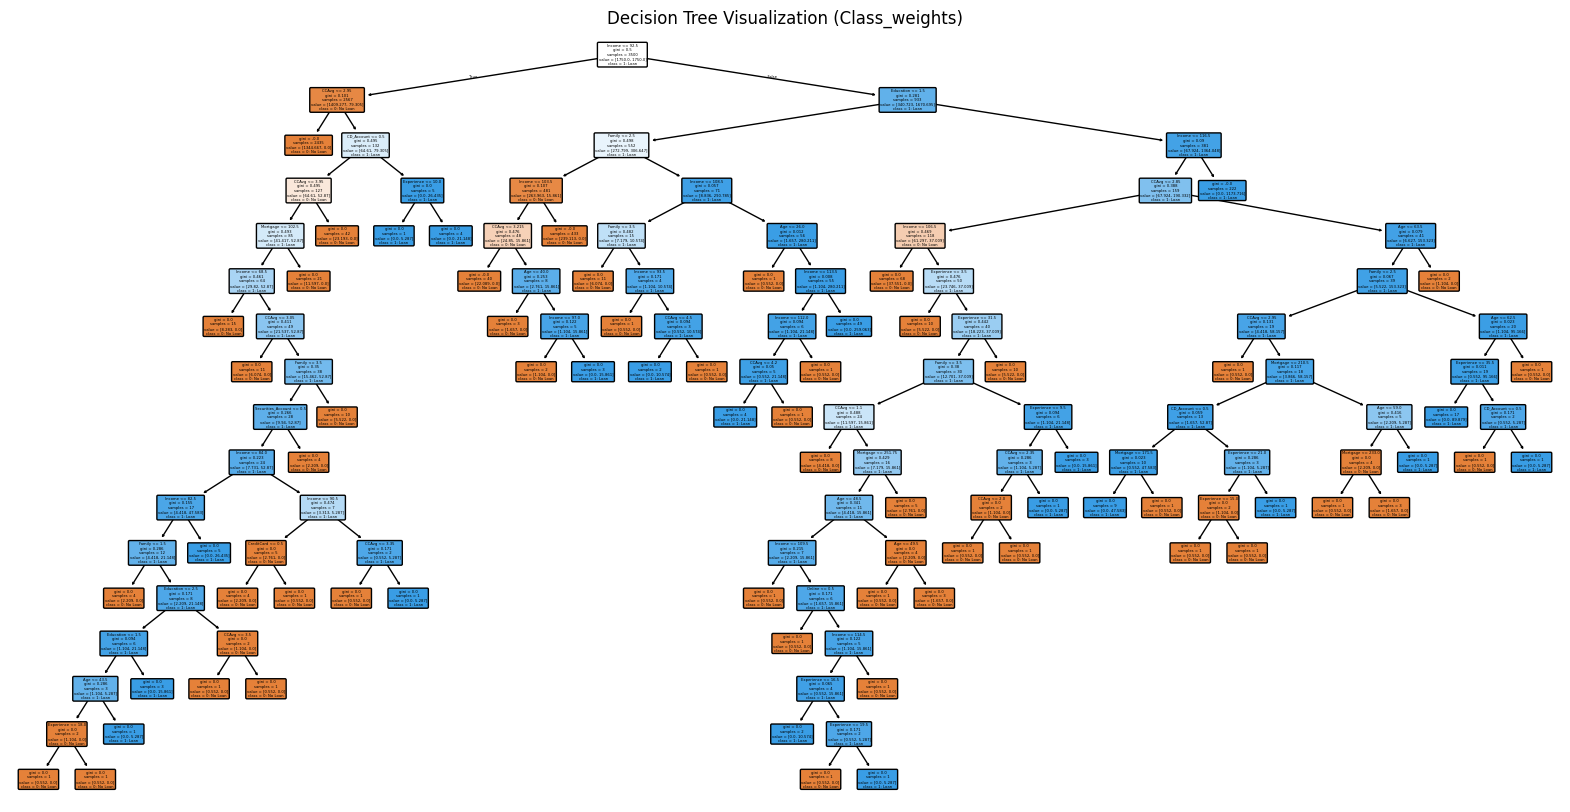

In [73]:
# visualize the decision tree
plt.figure(figsize=(20,10))
out = tree.plot_tree(model1, filled=True, feature_names=X.columns, class_names=["0: No Loan", "1: Loan"], rounded=True)
plt.title('Decision Tree Visualization (Class_weights)')
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [74]:
# text report showing the rules of a decision tree with class_weights

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.44] class: 1
|   |   |   |   |   |   |   |   |   |--- I

In [75]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                             Imp
Income              6.370990e-01
Family              1.499393e-01
CCAvg               9.296445e-02
Education           8.574137e-02
Age                 8.478511e-03
CD_Account          8.198637e-03
Mortgage            7.600673e-03
Experience          7.589880e-03
Securities_Account  1.853859e-03
Online              5.342287e-04
CreditCard          1.401354e-18


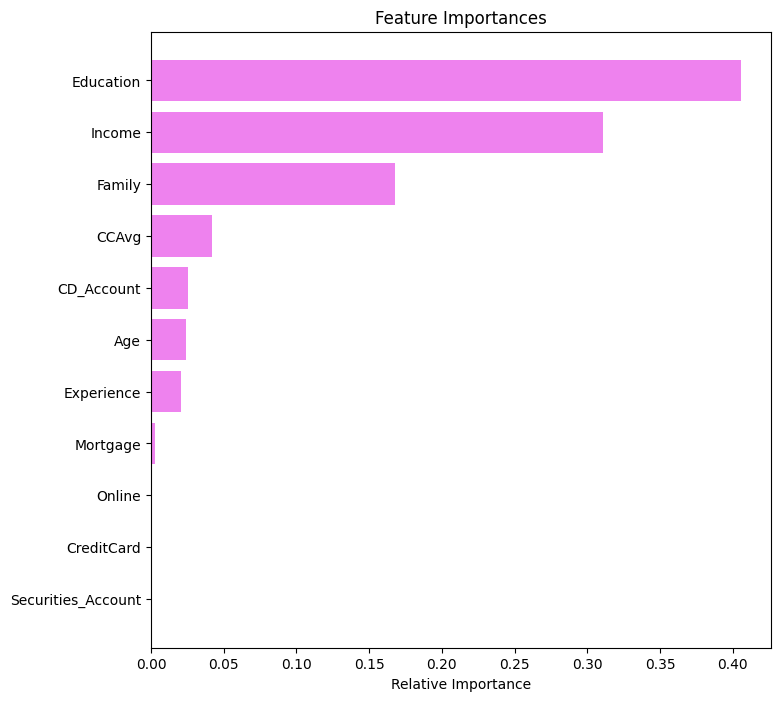

In [76]:
# plotting imortances
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The features `Education`, `Income` and `Family` are the important features from the Default Decision Tree Model.

## Model Performance Improvement

**Pre-Pruning**

In [77]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_recall_score - test_recall_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 4
Max leaf nodes: 10
Min samples split: 10
Best test recall score: 0.8657718120805369


* The chosen pre-pruning parameters ensure that the model is simple and generalizes well without overfitting to the training data.
* `Recall` is a `critical metric` here, as you want to identify as many loan-takers as possible, and `86.58%` is a respectable recall score given the complexity reduction introduced by pre-pruning.

In [78]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

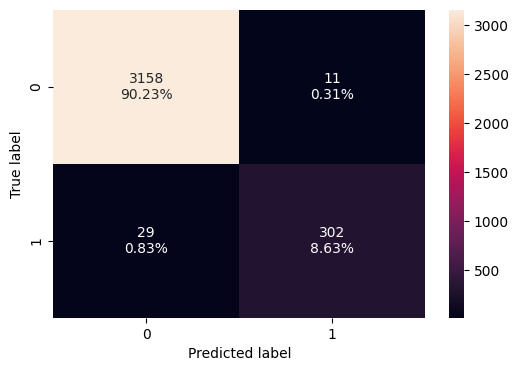

In [79]:
# confusion matrix for train model
confusion_matrix_sklearn(model2, X_train, y_train)

In [80]:
# performance of decision tree for pre-pruning
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.988571  0.912387   0.964856  0.937888

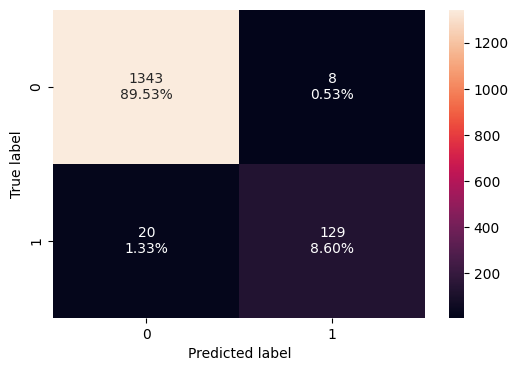

In [81]:
# confusion matrix of decision tree for pre-pruning
confusion_matrix_sklearn(model2, X_test, y_test)

In [82]:
# performance of test model
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.981333  0.865772   0.941606  0.902098

**Confusion Matrix**

The **Training model**
- Correctly predicted `3158 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- `11` incorrect predictions for `False Positives` and `29` `False Negatives`
- Correctly predicted `302 customers` (`True Positive`) as accepting a loan (`Personal_Loan=1`).

The **Test model**
- Correctly predicted `1334 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- Incorrectly predicted that `17 customers` (`False Positive`) would accept the loan (`Personal_Loan = 1`) but they did not.
- `21 customers` would not accept the loan (`Personal_Loan = 0`), but they actually did.
- Correctly predicted `128 customers` who accepted the loan (`Personal_Loan = 1`).

**Performance**
The pre-pruned model performs very well on the training set, with high accuracy, precision, recall, and F1 scores. This indicates that the pre-pruning process successfully simplified the model while maintaining strong predictive power.Training Accuracy is `100%`, suggesting `overfitting`.
- The model generalizes well to unseen data with only a small drop in recall, precision, and F1 score. The testing performance is `strong`, with over `98% accuracy`, `94% precision`, and a balanced `90% F1 score`. The slight drop in recall (`86.58%`) indicates that the model is missing a small portion of loan-takers, but the overall performance remains robust.


In [83]:
# identifying importances and sorting the indices
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

In [84]:
# print the importances data frame
print(
    pd.DataFrame(
        model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.448813
Income              0.333366
Family              0.160264
CCAvg               0.042308
CD_Account          0.015249
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


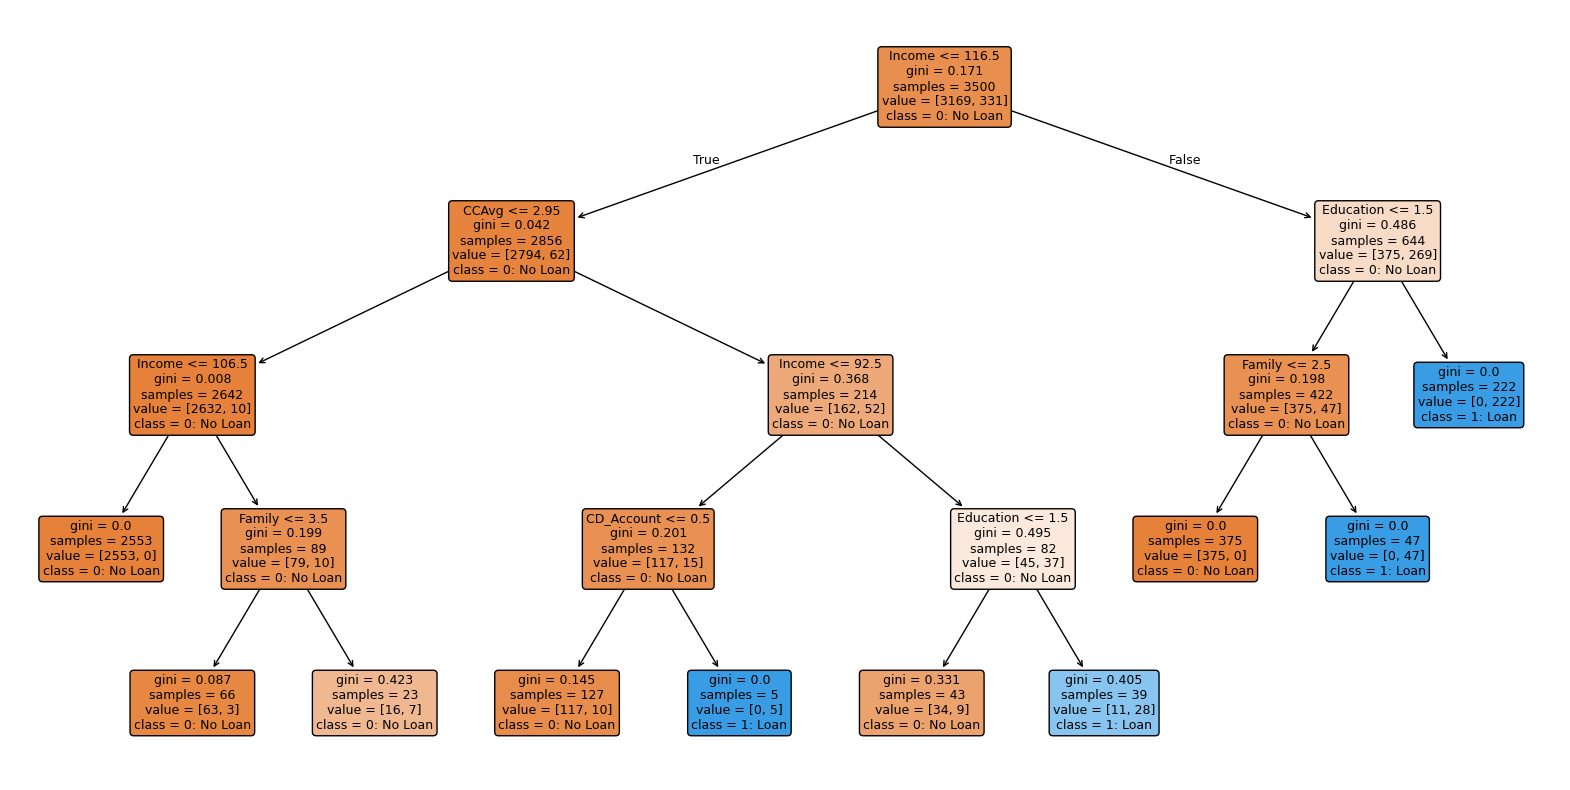

In [85]:
# plot the tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=["0: No Loan", "1: Loan"],
    rounded=True
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [86]:
# print the tree
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [34.00, 9.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   | 

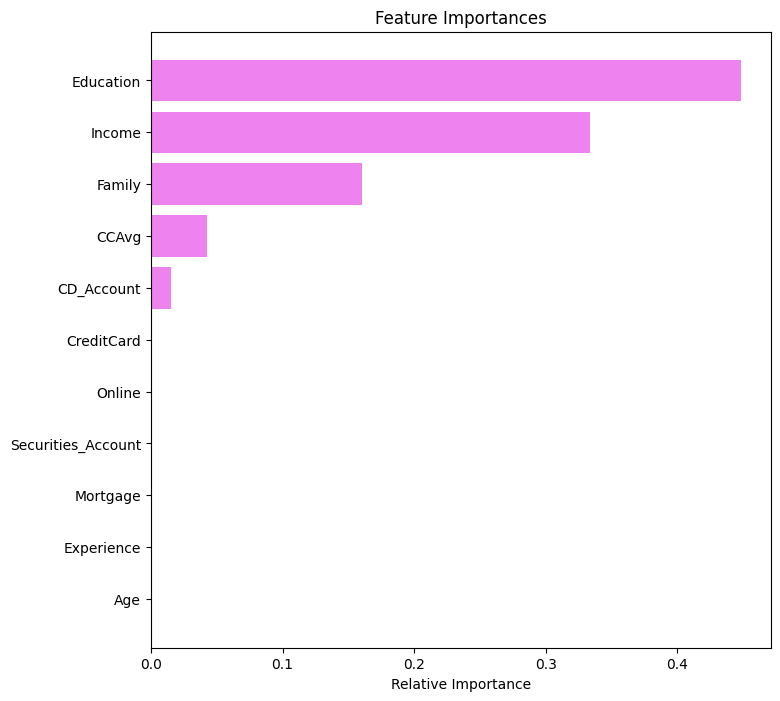

In [87]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Education`, `Income` and `Family` are still the important features as per Pre-pruning Decision Tree model.

**Post Pruning**

In [88]:
# calculate pruning path to determine effective alphas
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path)


ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000381    0.004787
8     0.000409    0.006423
9     0.000476    0.006900
10    0.000508    0.007407
11    0.000582    0.007989
12    0.000593    0.009175
13    0.000641    0.011740
14    0.000769    0.014817
15    0.000792    0.017985
16    0.001552    0.019536
17    0.002333    0.021869
18    0.003024    0.024893
19    0.003294    0.028187
20    0.006473    0.034659
21    0.023866    0.058525
22    0.056365    0.171255

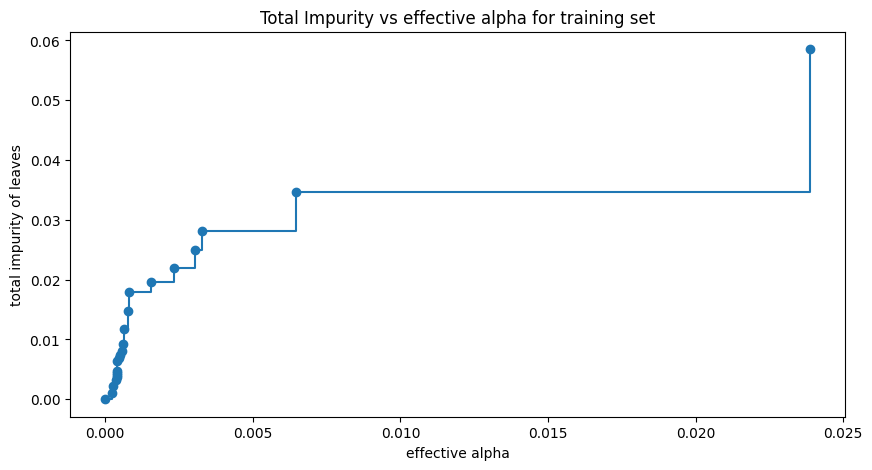

In [89]:
# plot the graph for total impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Low Alpha Values:** When the alpha is small (around 0 to 0.0004), the model is almost unpruned, meaning the decision tree is highly complex with low impurity.

**Moderate Alpha Values:** With alpha values between 0.0005 and 0.0023, the model is gradually simplified, maintaining a balance between training accuracy and generalization. This range is where the tree still performs well on the training set but avoids overfitting.

**High Alpha Values:** As alpha increases beyond 0.0030, the impurity rises significantly, indicating that the tree is becoming too simple and may underfit the data, losing important predictive features.

The ideal range for ccp_alpha is likely somewhere between 0.0005 and 0.0023, where the model achieves a good trade-off between complexity and generalization.

In [90]:
# calculating number of nodes in the last tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


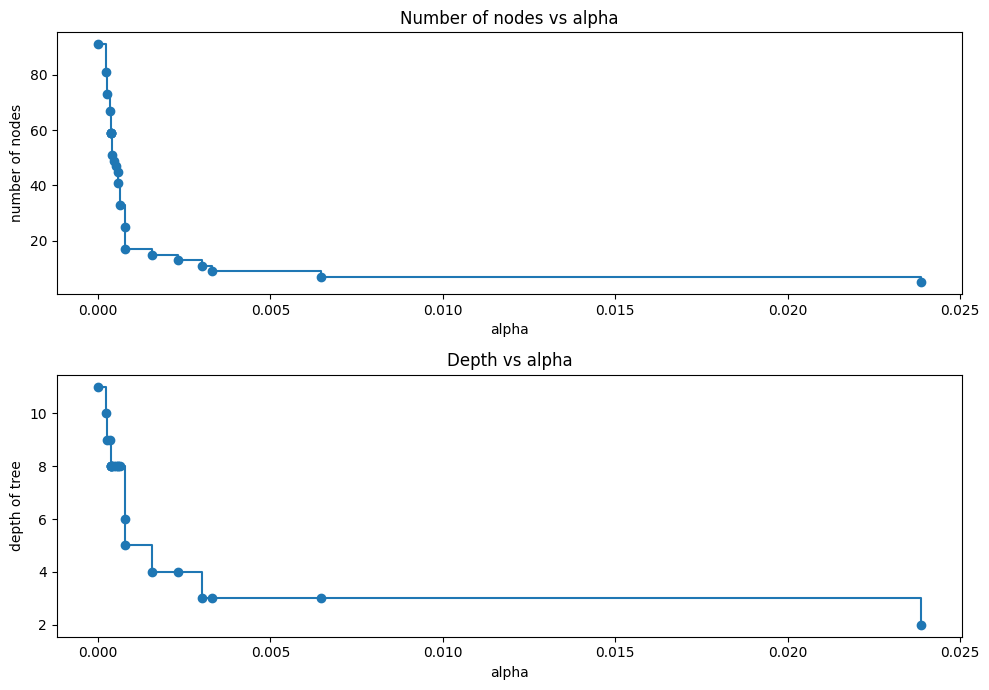

In [91]:
# plot the number of nodes, aplha and depth of tree and depth vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [92]:
# capture the recall train and test values
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

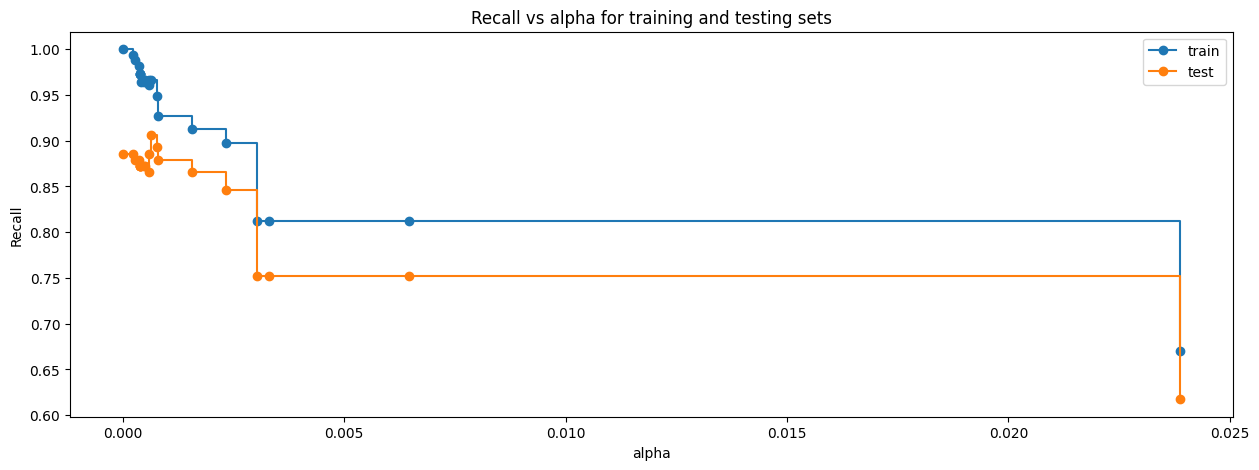

In [93]:
# plot the Recall vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [94]:
# identify and print the best model
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


In [95]:
# add class_weight and use the ccp_alpha from the best_model and fit the model
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.0006414326414326415, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

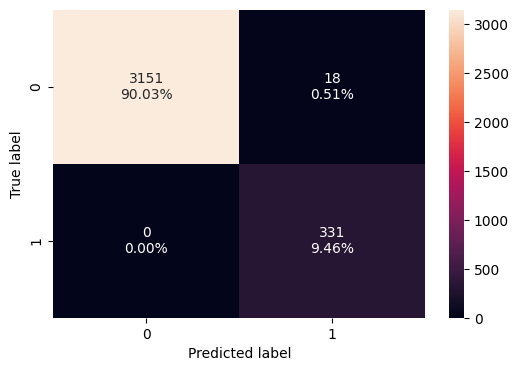

In [96]:
# confusion matrix for train variable
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [97]:
# performance of train set
decision_tree_post_perf_train = model_performance_classification_sklearn(
    estimator_2, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision        F1
0  0.994857     1.0   0.948424  0.973529

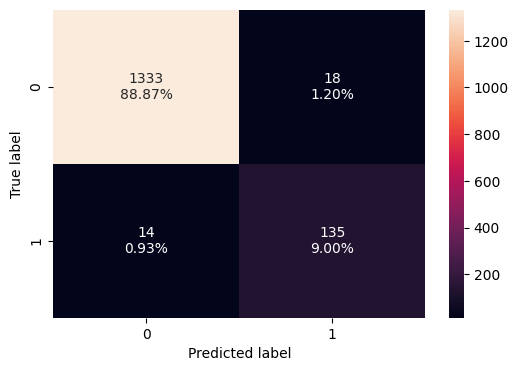

In [98]:
# confusion matrix for test set
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [99]:
# performance of test set
decision_tree_post_test = model_performance_classification_sklearn(
    estimator_2, X_test, y_test
)
decision_tree_post_test

Accuracy   Recall  Precision       F1
0  0.978667  0.90604   0.882353  0.89404

**Confusion Matrix**

The **Training model**
- Correctly predicted `3151 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- `18` incorrect predictions for `False Positives` and `0 False Negatives`.
- Correctly predicted `331 customers` (`True Positive`) as accepting a loan (`Personal_Loan=1`).

The **Test model**
- Correctly predicted `1334 customers` (`True Negatives`) as not accepting a loan (`Personal_Loan=0`)
- Incorrectly predicted that `17 customers` (`False Positive`) would accept the loan (`Personal_Loan = 1`) but they did not.
- `21 customers` would not accept the loan (`Personal_Loan = 0`), but they actually did.
- Correctly predicted `128 customers` who accepted the loan (`Personal_Loan = 1`).

**Performance**

- The post-pruned model performs excellently on both the training and test sets, with `minimal overfitting`. It maintains `strong recall`, which is critical for identifying loan-takers, while still achieving `high precision`.
- The model is well-suited for deployment, as it can effectively predict which customers are likely to take a loan with strong test set performance.
- Further fine-tuning of the decision tree parameters might marginally improve the results, but the current model offers a robust solution for the bank's needs.

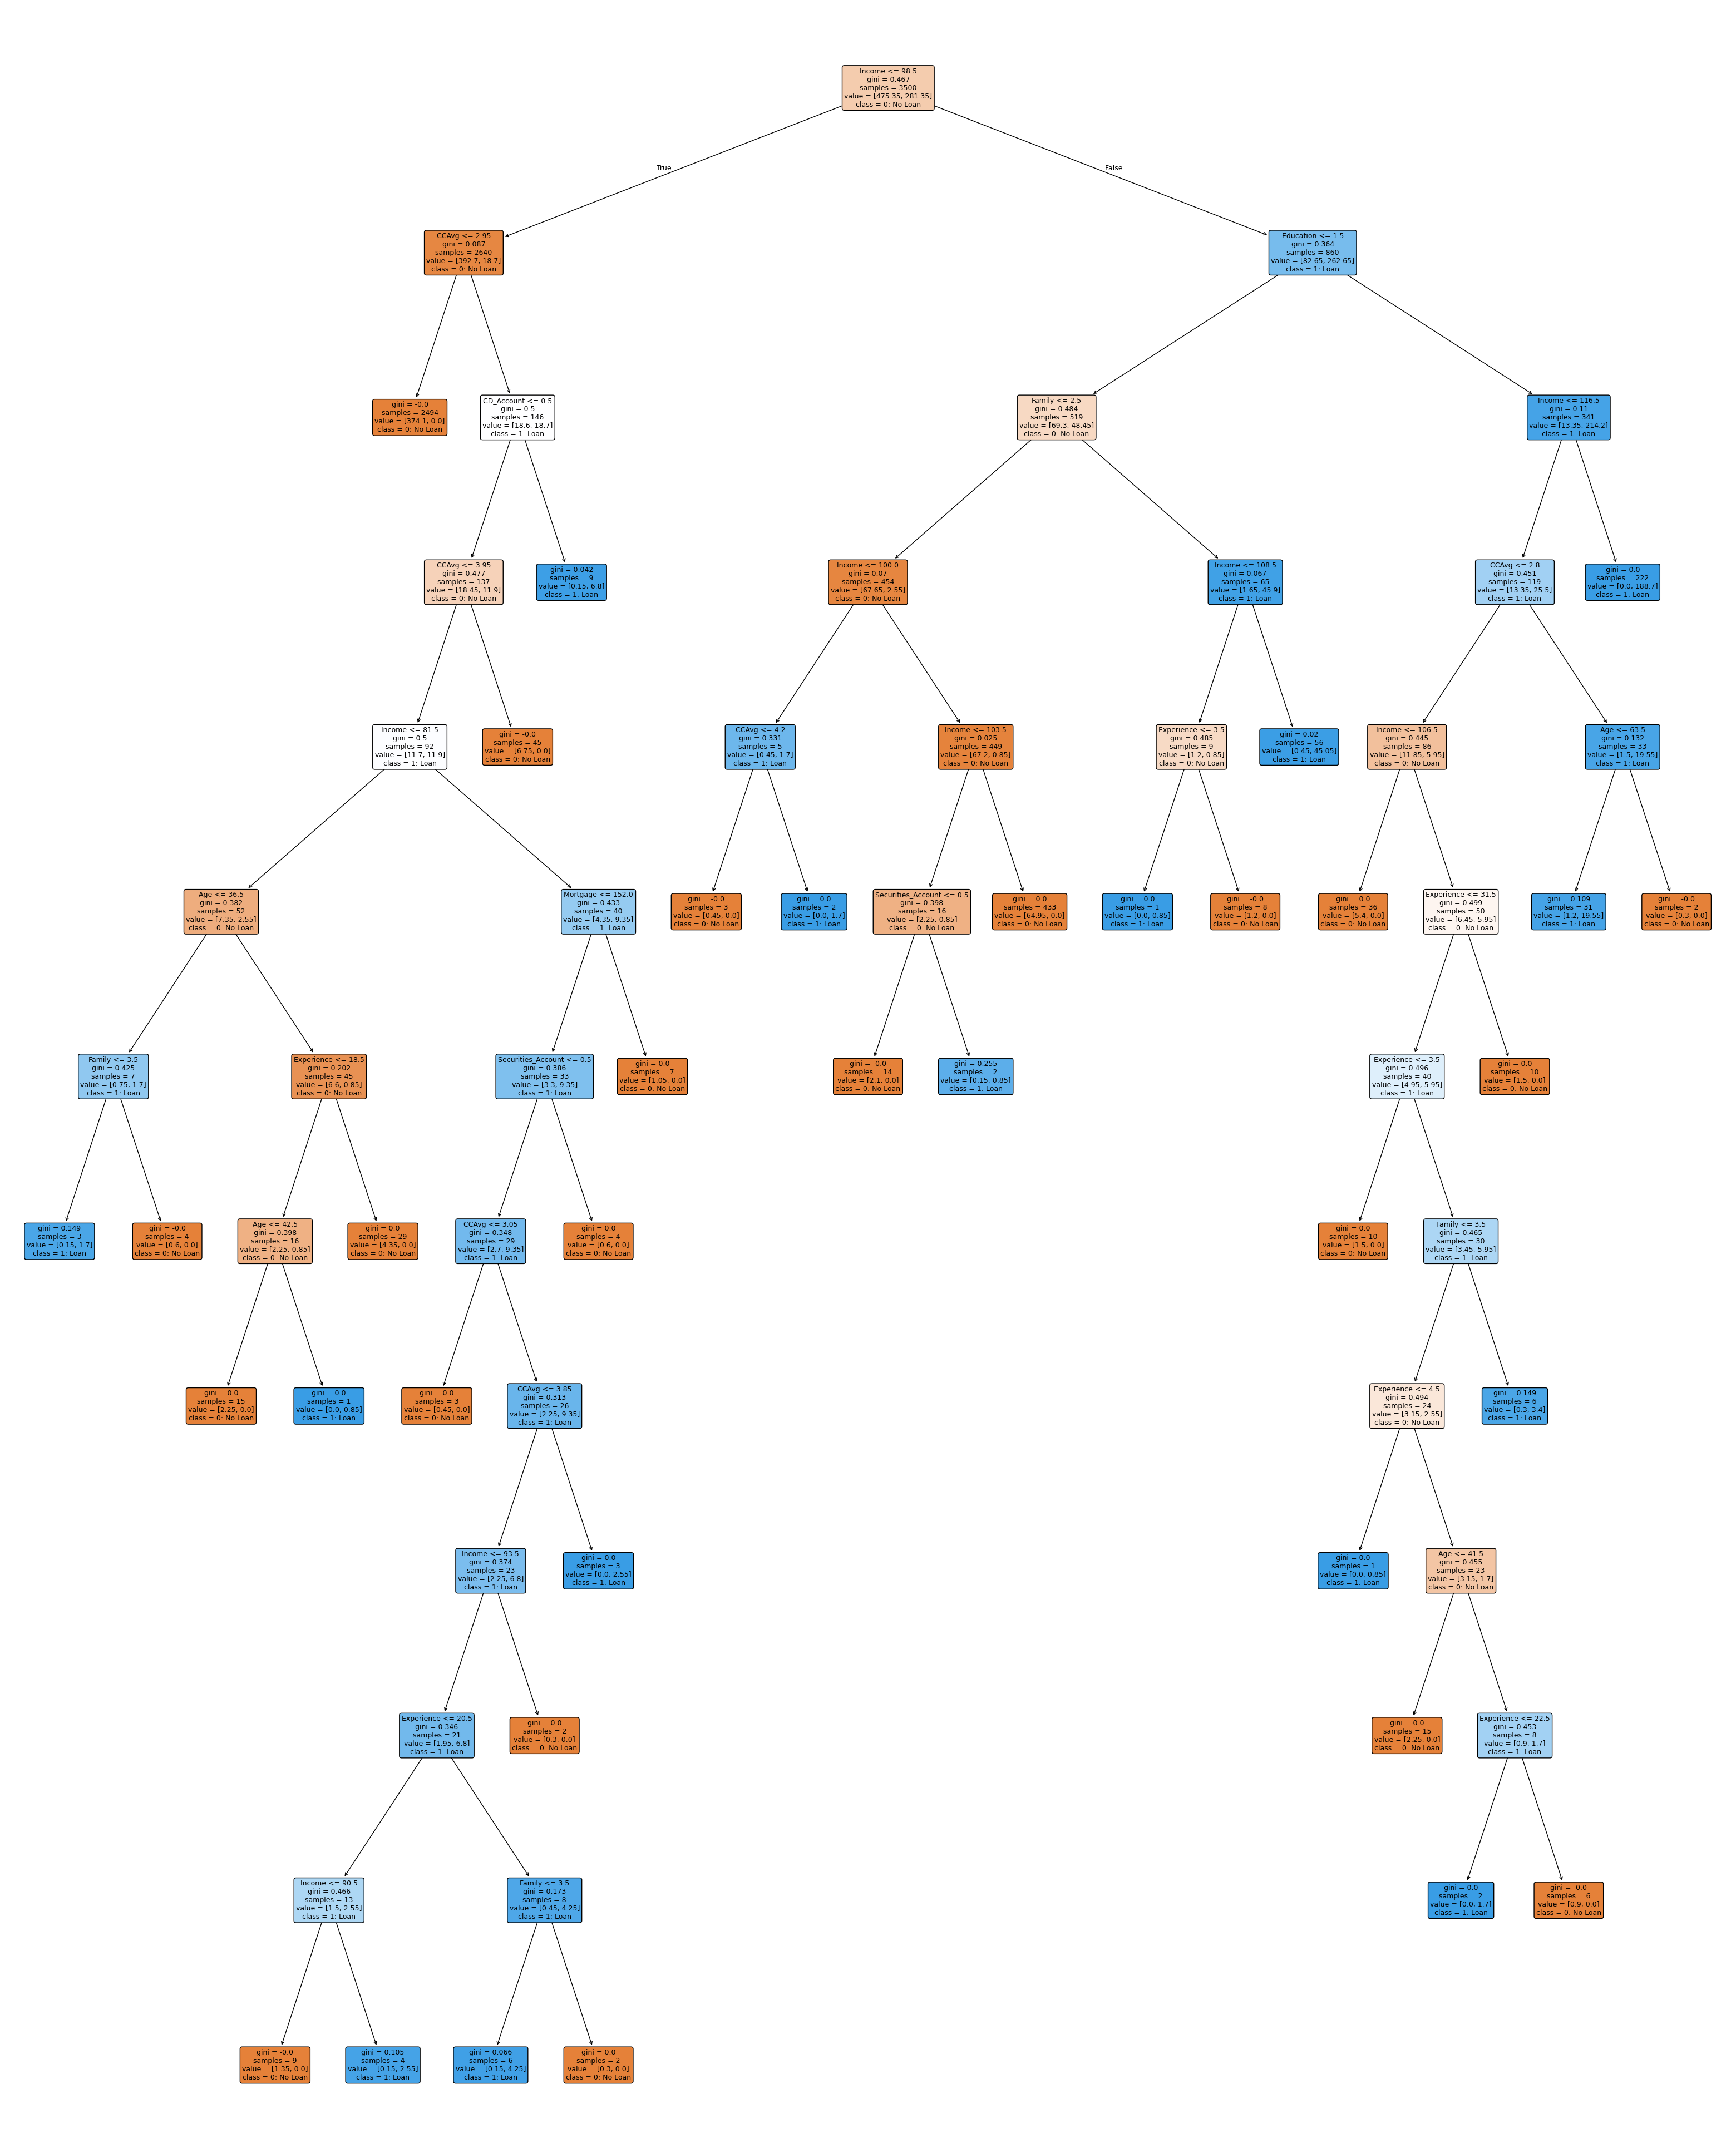

In [100]:
# plot the decision tree
plt.figure(figsize=(40, 50))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=["0: No Loan", "1: Loan"],
    rounded=True
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [101]:
# text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  42.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |--- Experience >  18.50
|   |   |   |   |   |   |   |--- weights: [4.35, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 152.00
|   |   |   |   |   |   

In [102]:
# generate the importances and sort
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

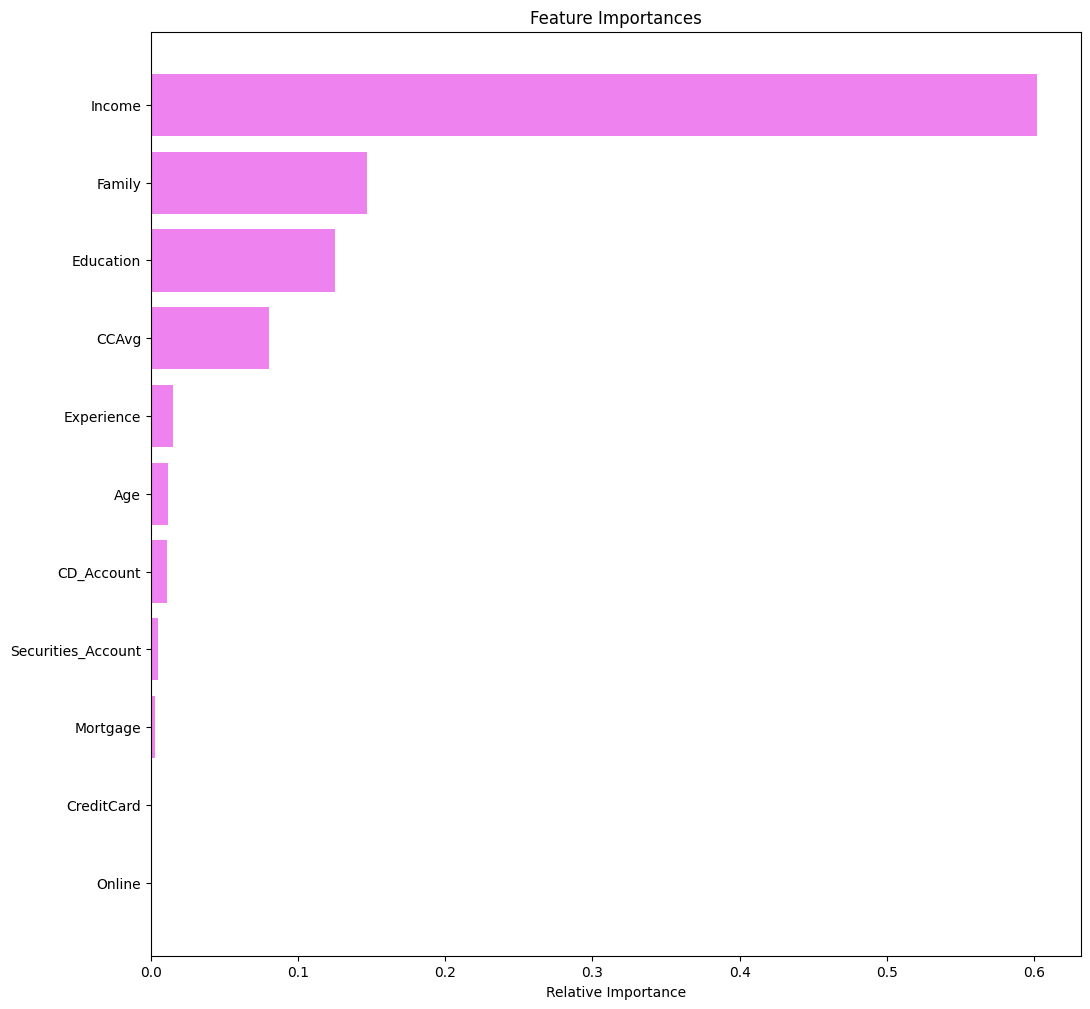

In [103]:
# plot the feature importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Income` is the most important feature followed by `Family`, `Education` and `CCAvg` for the post pruned tree.

## Model Performance Comparison and Final Model Selection

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.988571                      0.994857  
Recall                        0.912387                      1.000000  
Precision                     0.964856                      0.948424  
F1                            0.937888                      0.973529

**Accuracy**
1. **Default and Class-weighted models:** Both models show `100% accuracy`, which suggests `overfitting` on the training set. These models are perfect for classifying the training data but might not generalize well to unseen data.
2. **Pre-Pruned model:** The model `accuracy` is `98.86%` slightly lower than the overfitted models, indicating that the tree is `less complex` and `may generalize better`.
3. **Post-Pruned model:** The `accuracy` is `99.49%` which is still very `high`, but the model strikes a `good balance` between `complexity` and `generalization`.

**Recall**
1. **Default and Class-weighted models:** Both models show `100% recall`, meaning they are identifying all positive cases perfectly, which again could be due to overfitting.
2. **Pre-Pruned model:** Recall drops to `91.24%`, indicating that it misses some positive cases (false negatives), likely due to the reduced complexity of the tree.
3. **Post-Pruned model:** The recall is `100%`, showing that it can still capture all positive cases effectively.

**Precision**
1. **Default and Class-weighted models:** Both have `100% precision`, meaning every predicted positive is correct. This is another `sign of overfitting`.
2. **Pre-Pruned model:** `Precision` is `96.49%`, indicating that some predictions are false positives, but it's still `quite high`.
3. **Post-Pruned model:** `Precision` is `94.84%`, `slightly lower` than the `pre-pruned model`, but this is a `reasonable trade-off` for the increase in recall.

**F1 Score**
1. **Default and Class-weighted models:** Both have an `F1 score` of `1.0`, a `perfect balance` of `precision` and `recall`, but likely `overfitted`.
2. **Pre-Pruned model:** The `F1 score` is `93.79%`, which reflects a `good balance` between `precision` and `recall`. This model sacrifices some recall for better precision.
3. **Post-Pruned model:** The `F1 score` is `97.35%`, indicating a `strong balance` between `recall` and `precision`. This model improves recall without drastically sacrificing precision, making it a `well-balanced model`.


In [105]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.980000                         0.974667   
Recall                            0.885906                         0.859060   
Precision                         0.910345                         0.882759   
F1                                0.897959                         0.870748   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.981333                      0.978667  
Recall                        0.865772                      0.906040  
Precision                     0.941606                      0.882353  
F1                            0.902098                      0.894040

**Accuracy**
1. **Default and Class-weighted models:**
 `Accuracy` is `98.00%` for `Default Tree model`, which is `high` but suggests some `overfitting` from the `training set`, as the `accuracy` is `slightly lower` than in the training set.
The accuracy is `97.47% `for Class-weighted model, which is `slightly lower`, indicating that adding class weights might not have significantly improved performance in this case.

2. **Pre-Pruned model:** This model achieves `98.13%`, the `highest accuracy of the four models`, suggesting that reducing complexity through pre-pruning has helped it generalize well to unseen data.
3. **Post-Pruned model:** The `accuracy` is `97.87%`, which is still `quite high` and close to the default model's accuracy.
**Recall**
1. **Default and Class-weighted models:** `Recall` is `88.59%` for Default model, meaning it correctly identifies most positive cases, but it misses a small percentage of them.
The recall drops slightly to `85.91%` for Class-weighted model, meaning it misses more positive cases compared to the default.
2. **Pre-Pruned model:** `Recall` is `86.57%`, which is in between the two previous models, showing a `balance` between `precision` and `recall`.
3. **Post-Pruned model:** Recall is `90.60%`, the `highest` among the models. This indicates that the post-pruned model is better at identifying positive cases, which is important when the cost of false negatives is high.

**Precision**
1. **Default and Class-weighted models:** `Precision` is `91.03%` for Default model, meaning it correctly classifies most predicted positives, but there are some false positives.
Precision is `88.28%` for Class-weighted model, slightly lower than the default model.
2. **Pre-Pruned model:** Precision is `94.16%`, the `highest` among all models. This indicates that the `pre-pruned model` makes `fewer` false positive predictions.
3. **Post-Pruned model:** Precision is `88.24%`, lower than the pre-pruned model, but still `reasonable`. The focus on recall in this model leads to a slight drop in precision.

**F1 Score**
1. **Default and Class-weighted models:** The `F1 score` is `89.80%` for Default model, showing a `good balance` between `recall` and `precision`.
The `F1 score` is `87.07%` for `Class-weighted model`, slightly lower than the default, indicating a trade-off in balance between recall and precision.
2. **Pre-Pruned model:** The `F1 score` is `90.21%`, the `highest` among the models, suggesting that this model strikes the `best balance` between precision and recall.
3. **Post-Pruned model:** The `F1 score` is `89.40%`, which is `slightly lower` than the `pre-pruned model`, but still `close` to the default model's performance.

**Pre-Pruned Model** offers the `best balance` between `precision` and `recall`, making it a `strong candidate` when `accuracy` and `precision` are crucial.

**Post-Pruned Model** is the `best choice` when `high recall` is essential, such as in cases where false negatives are more costly (e.g., missing potential loan customers).

**The post-pruned model** offers the best balance between recall and precision. It is less likely to overfit while maintaining high performance, making it a strong candidate for deployment.

To maintain high recall and ensure continued performance, regularly monitor and update the model with fresh data to adapt to changing customer behaviors.

## Actionable Insights and Business Recommendations


* **What recommedations would you suggest to the bank?**
1. **Target High-Income and Educated Customers:** Income and education are likely to remain strong predictors for loan acceptance. The bank should focus its marketing on these segments.
2. **Focus on Digital Channels:** Customers who use internet banking and other online services may be more likely to accept loans. Marketing efforts can be directed toward these customers.
3. **Leverage Family Size:** Customers with larger families may have more financial needs, making them more likely to take loans.
4. **Personalized Loan Offers:** Create targeted offers for customers who meet specific criteria, such as larger loan amounts for higher-income customers or refinancing offers for customers with high mortgages.
5. **Follow-Up with Customers Who Did Not Take Loans:**Offer additional incentives or benefits to customers who were predicted as loan-takers but did not immediately convert, such as limited-time offers or more favorable loan terms.


___

In [106]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Machine Learning/Project2-PersonalLoanCampaign/PersonalLoanCampain-AkkirajuIvaturi.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Machine Learning/Project2-PersonalLoanCampaign/PersonalLoanCampain-AkkirajuIvaturi.ipynb to html
[NbConvertApp] Writing 5601360 bytes to /content/drive/MyDrive/Machine Learning/Project2-PersonalLoanCampaign/PersonalLoanCampain-AkkirajuIvaturi.html
